# Data Exploration

In [2]:
# Load the Pandas libraries with alias 'pd' 
#import kaggle as kg
import pandas as pd
import numpy as np
import scipy as sc

%matplotlib inline
import os
from os.path import join
from pprint import pprint

import matplotlib.pyplot as plt

In [32]:
d_path = os.path.dirname(os.getcwd())
d_file = "historical_stock_prices.csv"
print(join(d_path,d_file))

C:\Users\EGEMEN\historical_stock_prices.csv


In [33]:
#Loading data
data = pd.read_csv(join(d_path, d_file))

FileNotFoundError: [Errno 2] File C:\Users\EGEMEN\historical_stock_prices.csv does not exist: 'C:\\Users\\EGEMEN\\historical_stock_prices.csv'

In [3]:
file_path="C:\\Users\\EGEMEN\\Desktop\\ml_project\\data\\historical_stock_prices.csv"
data = pd.read_csv(file_path)

# Giving basic information regarding the dataset such as shape, data types and descriptive statistics that summarize columns

In [4]:
# print shape
print('Data Dimensionality: ',data.shape)
print("There are " + str(data.shape[0]) + " rows and "+ str(data.shape[1])+" attributes in historical stock prices data")

Data Dimensionality:  (20973889, 8)
There are 20973889 rows and 8 attributes in historical stock prices data


In [5]:
# print attribute names

print('Attribute Names: ',data.columns)

Attribute Names:  Index(['ticker', 'open', 'close', 'adj_close', 'low', 'high', 'volume',
       'date'],
      dtype='object')


# Meanings of the attributes
* Ticker: The symbol for the stock
* open: The open price
* close: The close price
* adj_close: The adjusted close price
* low: The low price
* high: The high price
* volume: The volume
* date: The date

In [6]:
print("The number of stocks are: " +str((data['ticker'].nunique())))

The number of stocks are: 5685


In [7]:
# print first 5 rows in your dataset
print('Head of Data: ')
data.head()

Head of Data: 


,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14


In [39]:
# print data types of the columns
print('Data types: ',data.dtypes)

Data types:  ticker        object
open         float64
close        float64
adj_close    float64
low          float64
high         float64
volume         int64
date          object
dtype: object


In [40]:
data.isnull().sum()  # NaN counts in each column

ticker       0
open         0
close        0
adj_close    0
low          0
high         0
volume       0
date         0
dtype: int64

There is no missing value at any attribute or row so we are fine to proceed without preprocessing.

In [41]:
#Descriptive statistics of taxitrips data
data.describe()

,open,close,adj_close,low,high,volume
count,2.097389e+07,2.097389e+07,2.097389e+07,2.097389e+07,2.097389e+07,2.097389e+07
mean,7.605823e+01,7.611403e+01,1.481184e+14,7.422064e+01,7.803857e+01,1.227043e+06
std,2.849639e+03,2.870159e+03,4.574674e+16,2.746059e+03,2.997937e+03,1.316686e+07
min,4.000000e-04,2.000000e-04,2.282650e-09,1.000000e-04,4.000000e-04,1.000000e+00
25%,7.500000e+00,7.500000e+00,4.620000e+00,7.360000e+00,7.630000e+00,2.210000e+04
50%,1.545000e+01,1.545000e+01,1.138199e+01,1.524000e+01,1.566000e+01,1.260000e+05
75%,2.972000e+01,2.972000e+01,2.472046e+01,2.928000e+01,3.010000e+01,6.074000e+05
max,2.034000e+06,1.779750e+06,1.894962e+19,1.440000e+06,2.070000e+06,4.483504e+09


# Preprocessing

In [42]:
type(data['date'].iloc[0])

str

The date attribute is string type object. It is better to convert it to datetime object to wrangle.

In [8]:
data['date']= pd.to_datetime(data['date'])

In [9]:
type(data['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Now it's date time object.

In [10]:
data['date'].head()

0   2013-05-08
1   2013-05-09
2   2013-05-10
3   2013-05-13
4   2013-05-14
Name: date, dtype: datetime64[ns]

In [11]:
print("The minimum year of the dataset is: "+str(min(data['date'].dt.year))  )
print("The maximum year of the dataset is: "+str(max(data['date'].dt.year))  )

The minimum year of the dataset is: 1970
The maximum year of the dataset is: 2018


In [15]:
#Send the parameter as zero to be displayed until the start or end.
def filter_by_year(data, start=0, end=0):
    if start and end: 
        return data[(data['date'].dt.year<end) & (data['date'].dt.year>start)]
    elif not start:
        return data[(data['date'].dt.year<end)]
    elif not end: 
        return data[(data['date'].dt.year>start)]

In [18]:
data.sort_values(by='date')

,ticker,open,close,adj_close,low,high,volume,date
4285669,XOM,1.929688,1.937500,0.025623,1.925781,1.937500,1174400,1970-01-02
14184994,AA,7.140915,7.140915,1.986261,7.140915,7.225020,22500,1970-01-02
15384996,BA,0.925926,0.979424,0.229325,0.925926,0.979424,634400,1970-01-02
18215303,DIS,0.688281,0.683144,0.282199,0.683144,0.689565,1109700,1970-01-02
18189682,PG,1.710938,1.718750,0.020346,1.708984,1.722656,832000,1970-01-02
...,...,...,...,...,...,...,...,...
8401737,INST,38.200001,39.099998,39.099998,38.200001,39.150002,240400,2018-08-24
8400366,SQQQ,12.120000,11.890000,11.890000,11.870000,12.120000,13058000,2018-08-24
8392730,PBFX,21.799999,21.600000,21.600000,21.500000,21.850000,87000,2018-08-24
8414092,POPE,73.000000,73.000000,73.000000,73.000000,73.000000,1100,2018-08-24


In [12]:
def filter_by_company(whole_data, stock):
    return whole_data[whole_data['ticker']==stock]

In [22]:
filter_by_company(data, "AA").shape

(12273, 8)

### Separating the data according to the economic recessions in the USA. 
Information about the recession dates retrieved from the site below: 

https://en.wikipedia.org/wiki/List_of_recessions_in_the_United_States

In [49]:
def separate_data(data):
    #after_2009=data[data['date'].dt.year>2009]
    after_2009=filter_by_year(data, start= 2009)
    #between_2001_07=data[(data['date'].dt.year<2007) & (data['date'].dt.year>2001)]
    between_2001_07=filter_by_year(data, 2001, 2007)
    
    #between_91_2001=data[(data['date'].dt.year<2001) & (data['date'].dt.year>1991)]
    between_91_2001=filter_by_year(data, 1991, 2001)
    
    #between_82_90=data[(data['date'].dt.year<1990) & (data['date'].dt.year>1982)]
    between_82_90=filter_by_year(data, 1982, 1990)
    
    #before_80=data[data['date'].dt.year<1980]
    before_80=filter_by_year(data, end=1980) 
    
    return [after_2009, between_2001_07, between_91_2001,between_82_90, before_80]

In [50]:
print("The minimum year of the dataset is: "+str(min(separate_data(data)[0]['date'].dt.year))  )

The minimum year of the dataset is: 2010


So, splitting the data works as what we expected.

In [51]:
dfs=separate_data(data)
print('Row count of After 2009: ',dfs[0].shape[0])
print('Row count of Between 2001 and 2007: ',dfs[1].shape[0])
print('Row count of Between 1991 and 2001: ',dfs[2].shape[0])
print('Row count of Between 1982 and 1990: ',dfs[3].shape[0])
print('Row count of Before 1980: ',dfs[4].shape[0])

Row count of After 2009:  9338934
Row count of Between 2001 and 2007:  3164685
Row count of Between 1991 and 2001:  3498670
Row count of Between 1982 and 1990:  1158835
Row count of Before 1980:  164499


In [52]:
def count_non_recessed(data, data_frames):
    non_recessed_count=0
    for df in data_frames:
        non_recessed_count+=df.shape[0]
    print("We lost "+str(data.shape[0]- non_recessed_count)+ " number of rows after separating the datasets. ")

In [13]:
count_non_recessed(data, dfs)

NameError: name 'count_non_recessed' is not defined

In [54]:
def combine_datasets(data_frames):
    non_recessed_data=pd.concat(data_frames)
    non_recessed_data=non_recessed_data.sort_values(by='date')
    return non_recessed_data

In [55]:
non_recessed_data=combine_datasets(dfs)

In [56]:
non_recessed_data

,ticker,open,close,adj_close,low,high,volume,date
10537878,IBM,18.225000,18.237499,1.624962,18.200001,18.287500,315200,1970-01-02
3892482,MRO,5.633611,5.757882,0.203525,5.633611,5.757882,105900,1970-01-02
12846742,CVX,3.195312,3.265625,0.072620,3.195312,3.265625,526400,1970-01-02
10103898,MCD,0.353909,0.364198,0.003755,0.353909,0.364198,2825600,1970-01-02
2515733,CNP,11.099500,11.169750,0.107916,10.994125,11.204875,24400,1970-01-02
...,...,...,...,...,...,...,...,...
3938624,IDRA,8.410000,9.170000,9.170000,8.400000,9.240000,418100,2018-08-24
16628203,FCX,14.540000,14.470000,14.470000,14.360000,14.790000,13287600,2018-08-24
738215,AIR,45.869999,45.990002,45.990002,45.610001,46.139999,87100,2018-08-24
11198367,CTU,25.280001,25.290001,25.290001,25.280001,25.299999,119100,2018-08-24


# Data Visualisation

In [57]:
#Visualise predicted and actual stock prices
#Send the multi argument as True if multi time-series are to be displayed. 
def visualise(actual, predicted=None, attribute='high', nof_datepts=10):
    plt.figure(figsize = (18,9))
    plt.grid()
    plt.plot(range(actual.shape[0]),actual[attribute])
    if predicted is not None:
        plt.plot(range(len(predicted)),predicted)
    plt.xticks(range(0,actual.shape[0],int(actual.shape[0]/nof_datepts)+1),actual['date'].loc[::int(actual.shape[0]/nof_datepts)+1],rotation=45)
    plt.xlabel('Date',fontsize=18)
    plt.ylabel(str(attribute)+ ' Prices of '+str(ticker),fontsize=18)
    plt.show()

In [58]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [59]:
apple = filter_by_company(non_recessed_data,"AAPL")

In [60]:
apple

,ticker,open,close,adj_close,low,high,volume,date
6788,AAPL,0.533482,0.508929,0.022985,0.504464,0.540179,28207200,1983-01-03
6792,AAPL,0.508929,0.537946,0.024295,0.500000,0.540179,55927200,1983-01-04
6808,AAPL,0.537946,0.540179,0.024396,0.529018,0.544643,35386400,1983-01-05
6812,AAPL,0.540179,0.520089,0.023489,0.517857,0.542411,24449600,1983-01-06
6828,AAPL,0.520089,0.491071,0.022178,0.491071,0.526786,43013600,1983-01-07
...,...,...,...,...,...,...,...,...
100491,AAPL,218.100006,215.460007,215.460007,215.110001,219.179993,30287700,2018-08-20
100492,AAPL,216.800003,215.039993,215.039993,214.029999,217.190002,26159800,2018-08-21
100493,AAPL,214.100006,215.050003,215.050003,213.839996,216.360001,19018100,2018-08-22
100494,AAPL,214.649994,215.490005,215.490005,214.600006,217.050003,18883200,2018-08-23


NameError: name 'ticker' is not defined

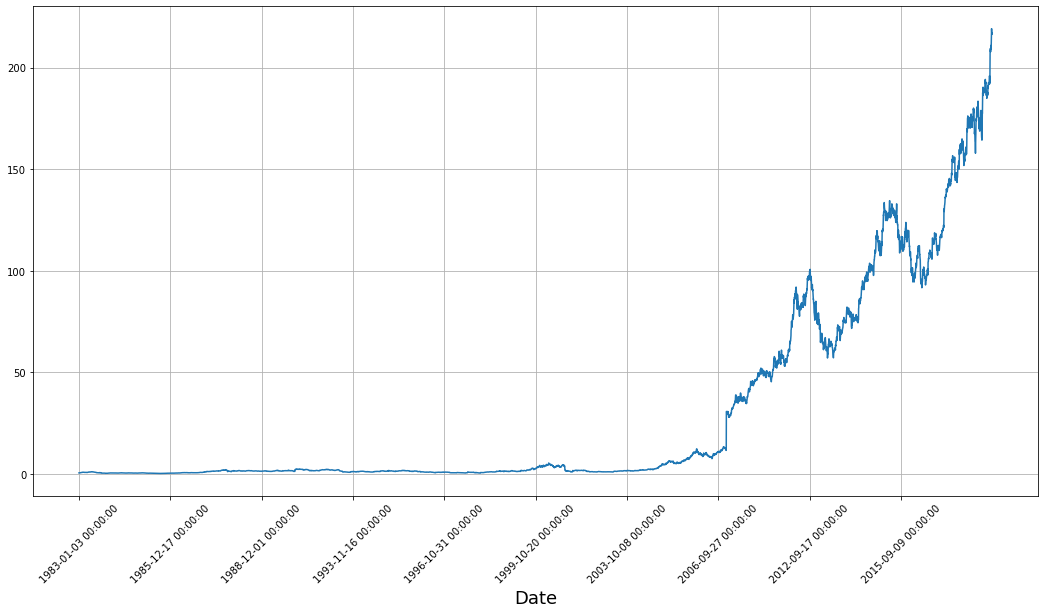

In [61]:
visualise(actual=apple)

In [62]:
ticker="AAPL"
apple_after_2009=filter_by_company(filter_by_year(data, start=2009), ticker)

In [63]:
apple_after_2009

,ticker,open,close,adj_close,low,high,volume,date
78258,AAPL,30.490000,30.572857,20.544939,30.340000,30.642857,123432400,2010-01-04
78274,AAPL,30.657143,30.625713,20.580460,30.464285,30.798571,150476200,2010-01-05
78280,AAPL,30.625713,30.138571,20.253105,30.107143,30.747143,138040000,2010-01-06
78296,AAPL,30.250000,30.082857,20.215658,29.864286,30.285715,119282800,2010-01-07
78302,AAPL,30.042856,30.282858,20.350058,29.865715,30.285715,111902700,2010-01-08
...,...,...,...,...,...,...,...,...
100491,AAPL,218.100006,215.460007,215.460007,215.110001,219.179993,30287700,2018-08-20
100492,AAPL,216.800003,215.039993,215.039993,214.029999,217.190002,26159800,2018-08-21
100493,AAPL,214.100006,215.050003,215.050003,213.839996,216.360001,19018100,2018-08-22
100494,AAPL,214.649994,215.490005,215.490005,214.600006,217.050003,18883200,2018-08-23


# Creating Windows

In [68]:
import tensorflow as tf

In [69]:
tf.__version__

'2.1.0'

In [70]:
apple_high=apple_after_2009['high'].to_numpy()

In [71]:
apple_high

array([ 30.6428566 ,  30.79857063,  30.74714279, ..., 216.36000061,
       217.05000305, 216.8999939 ])

In [72]:
tf_apple=tf.data.Dataset.from_tensor_slices(apple_high)
for i in tf_apple:
    print(i.numpy())

30.6428565979004
30.798570632934602
30.747142791748
30.2857151031494
30.2857151031494
30.4285717010498
29.9671421051025
30.1328563690186
30.0657138824463
30.228570938110398
30.7414283752441
30.792856216430696
30.4728565216064
29.6428565979004
29.242856979370103
30.530000686645497
30.082857131957997
29.3571434020996
28.885713577270497
28.0
28.045713424682603
28.600000381469698
28.3385715484619
28.0
28.2685718536377
28.2142848968506
28.08571434021
28.5357151031494
28.8057136535645
29.098571777343803
29.187143325805696
29.127141952514602
29.0285720825195
28.9285717010498
28.761428833007802
28.7771434783936
28.9799995422363
29.309999465942397
29.9285717010498
30.118572235107397
29.9814281463623
30.131427764892603
31.385713577270497
31.441429138183604
32.1428565979004
32.2114295959473
32.2142868041992
32.5328559875488
32.2142868041992
32.1399993896484
32.3499984741211
32.1428565979004
32.1771430969238
32.2857131958008
32.6828575134277
32.885715484619105
32.995716094970696
33.135715484619105

87.38571166992192
88.0571441650391
87.2414321899414
88.2828598022461
89.2671432495117
89.2857131958008
89.1257171630859
88.81857299804692
88.8228607177734
90.0
91.2300033569336
90.5714263916016
90.9657135009766
92.59857177734379
95.0214309692383
96.4114303588867
95.5714263916016
95.6999969482422
95.6399993896484
97.2671432495117
96.5857162475586
96.80999755859379
95.9357147216797
95.5142822265625
96.4485702514648
96.62142944335942
96.8985748291016
97.4971466064453
97.61285400390621
95.7285690307617
95.6999969482422
97.9285736083984
99.56857299804692
99.97142791748051
100.33285522460899
100.569999694824
100.00856781005899
100.72428894043001
99.3028564453125
98.9685745239258
96.09857177734379
97.4528579711914
97.3014297485352
96.6785736083984
95.1928558349609
95.9800033569336
96.3214263916016
95.1428604125977
92.5085678100586
91.4985733032227
92.1399993896484
92.45714569091801
90.7685699462891
90.7328567504883
92.9000015258789
93.2557144165039
91.7228546142578
90.2528533935547
90.7685699

112.470001220703
113.75
114.360000610352
112.48000335693399
118.12000274658199
119.19000244140601
120.0
119.16999816894501
119.08999633789101
120.51000213623001
120.23000335693399
120.25
119.83999633789101
122.150001525879
124.91999816894501
127.48000335693399
127.279998779297
128.88000488281202
128.77999877929702
129.02999877929702
129.5
133.0
133.600006103516
131.600006103516
130.86999511718798
130.570007324219
130.27999877929702
129.520004272461
129.559997558594
128.75
129.36999511718798
129.570007324219
127.220001220703
124.76999664306601
124.900001525879
125.400001525879
124.949996948242
127.319999694824
129.160003662109
129.25
128.399993896484
127.849998474121
128.039993286133
126.819999694824
124.87999725341801
124.699996948242
126.400001525879
126.48999786376999
125.12000274658199
125.55999755859399
127.51000213623001
128.11999511718798
126.400001525879
126.58000183105499
127.209999084473
128.570007324219
127.290000915527
127.12999725341801
127.099998474121
126.139999389648
128

In [73]:
windowed_apple=tf_apple.window(6, shift=1, drop_remainder=True)
for windows in windowed_apple:
    for window in windows:
        print(window.numpy(), end= " ")
    print()

30.6428565979004 30.798570632934602 30.747142791748 30.2857151031494 30.2857151031494 30.4285717010498 
30.798570632934602 30.747142791748 30.2857151031494 30.2857151031494 30.4285717010498 29.9671421051025 
30.747142791748 30.2857151031494 30.2857151031494 30.4285717010498 29.9671421051025 30.1328563690186 
30.2857151031494 30.2857151031494 30.4285717010498 29.9671421051025 30.1328563690186 30.0657138824463 
30.2857151031494 30.4285717010498 29.9671421051025 30.1328563690186 30.0657138824463 30.228570938110398 
30.4285717010498 29.9671421051025 30.1328563690186 30.0657138824463 30.228570938110398 30.7414283752441 
29.9671421051025 30.1328563690186 30.0657138824463 30.228570938110398 30.7414283752441 30.792856216430696 
30.1328563690186 30.0657138824463 30.228570938110398 30.7414283752441 30.792856216430696 30.4728565216064 
30.0657138824463 30.228570938110398 30.7414283752441 30.792856216430696 30.4728565216064 29.6428565979004 
30.228570938110398 30.7414283752441 30.792856216430696 3

35.9228553771973 36.024284362793004 36.9685707092285 37.075714111328104 37.77000045776371 38.074287414550795 
36.024284362793004 36.9685707092285 37.075714111328104 37.77000045776371 38.074287414550795 37.785713195800795 
36.9685707092285 37.075714111328104 37.77000045776371 38.074287414550795 37.785713195800795 38.325714111328104 
37.075714111328104 37.77000045776371 38.074287414550795 37.785713195800795 38.325714111328104 38.4528579711914 
37.77000045776371 38.074287414550795 37.785713195800795 38.325714111328104 38.4528579711914 38.62571334838871 
38.074287414550795 37.785713195800795 38.325714111328104 38.4528579711914 38.62571334838871 39.524284362793004 
37.785713195800795 38.325714111328104 38.4528579711914 38.62571334838871 39.524284362793004 39.7085723876953 
38.325714111328104 38.4528579711914 38.62571334838871 39.524284362793004 39.7085723876953 40.540000915527294 
38.4528579711914 38.62571334838871 39.524284362793004 39.7085723876953 40.540000915527294 41.0499992370605 
38.

47.1800003051758 47.5 47.762855529785206 47.8928565979004 48.0499992370605 49.0328559875488 
47.5 47.762855529785206 47.8928565979004 48.0499992370605 49.0328559875488 49.279998779296896 
47.762855529785206 47.8928565979004 48.0499992370605 49.0328559875488 49.279998779296896 49.2042846679688 
47.8928565979004 48.0499992370605 49.0328559875488 49.279998779296896 49.2042846679688 49.5200004577637 
48.0499992370605 49.0328559875488 49.279998779296896 49.2042846679688 49.5200004577637 49.7828559875488 
49.0328559875488 49.279998779296896 49.2042846679688 49.5200004577637 49.7828559875488 49.251426696777294 
49.279998779296896 49.2042846679688 49.5200004577637 49.7828559875488 49.251426696777294 49.7999992370605 
49.2042846679688 49.5200004577637 49.7828559875488 49.251426696777294 49.7999992370605 48.3285713195801 
49.5200004577637 49.7828559875488 49.251426696777294 49.7999992370605 48.3285713195801 47.8400001525879 
49.7828559875488 49.251426696777294 49.7999992370605 48.3285713195801 4

50.26142883300779 50.135715484619105 50.0 49.885715484619105 49.955715179443395 50.0 
50.135715484619105 50.0 49.885715484619105 49.955715179443395 50.0 49.5885696411133 
50.0 49.885715484619105 49.955715179443395 50.0 49.5885696411133 49.4642868041992 
49.885715484619105 49.955715179443395 50.0 49.5885696411133 49.4642868041992 48.7457160949707 
49.955715179443395 50.0 49.5885696411133 49.4642868041992 48.7457160949707 48.0200004577637 
50.0 49.5885696411133 49.4642868041992 48.7457160949707 48.0200004577637 48.7214279174805 
49.5885696411133 49.4642868041992 48.7457160949707 48.0200004577637 48.7214279174805 48.915714263915994 
49.4642868041992 48.7457160949707 48.0200004577637 48.7214279174805 48.915714263915994 48.7071418762207 
48.7457160949707 48.0200004577637 48.7214279174805 48.915714263915994 48.7071418762207 47.997142791748 
48.0200004577637 48.7214279174805 48.915714263915994 48.7071418762207 47.997142791748 47.985713958740206 
48.7214279174805 48.915714263915994 48.70714187

56.01142883300779 55.334285736084006 54.0 54.332859039306605 55.0857124328613 55.5157127380371 
55.334285736084006 54.0 54.332859039306605 55.0857124328613 55.5157127380371 55.1428565979004 
54.0 54.332859039306605 55.0857124328613 55.5157127380371 55.1428565979004 54.4114303588867 
54.332859039306605 55.0857124328613 55.5157127380371 55.1428565979004 54.4114303588867 55.172855377197294 
55.0857124328613 55.5157127380371 55.1428565979004 54.4114303588867 55.172855377197294 56.029998779296896 
55.5157127380371 55.1428565979004 54.4114303588867 55.172855377197294 56.029998779296896 56.237144470214794 
55.1428565979004 54.4114303588867 55.172855377197294 56.029998779296896 56.237144470214794 57.2142868041992 
54.4114303588867 55.172855377197294 56.029998779296896 56.237144470214794 57.2142868041992 59.0328559875488 
55.172855377197294 56.029998779296896 56.237144470214794 57.2142868041992 59.0328559875488 60.408573150634794 
56.029998779296896 56.237144470214794 57.2142868041992 59.032855

59.2400016784668 59.7928581237793 60.3928565979004 61.1071434020996 60.8571434020996 60.407142639160206 
59.7928581237793 60.3928565979004 61.1071434020996 60.8571434020996 60.407142639160206 60.4142875671387 
60.3928565979004 61.1071434020996 60.8571434020996 60.407142639160206 60.4142875671387 60.06428527832029 
61.1071434020996 60.8571434020996 60.407142639160206 60.4142875671387 60.06428527832029 60.855712890625 
60.8571434020996 60.407142639160206 60.4142875671387 60.06428527832029 60.855712890625 61.352855682373 
60.407142639160206 60.4142875671387 60.06428527832029 60.855712890625 61.352855682373 61.6242866516113 
60.4142875671387 60.06428527832029 60.855712890625 61.352855682373 61.6242866516113 61.0714302062988 
60.06428527832029 60.855712890625 61.352855682373 61.6242866516113 61.0714302062988 61.2071418762207 
60.855712890625 61.352855682373 61.6242866516113 61.0714302062988 61.2071418762207 60.728572845459006 
61.352855682373 61.6242866516113 61.0714302062988 61.20714187622

80.4599990844727 79.5557174682617 78.2142868041992 77.629997253418 80.2200012207031 81.9828567504883 
79.5557174682617 78.2142868041992 77.629997253418 80.2200012207031 81.9828567504883 81.8285751342773 
78.2142868041992 77.629997253418 80.2200012207031 81.9828567504883 81.8285751342773 82.3571395874023 
77.629997253418 80.2200012207031 81.9828567504883 81.8285751342773 82.3571395874023 80.8357162475586 
80.2200012207031 81.9828567504883 81.8285751342773 82.3571395874023 80.8357162475586 82.0 
81.9828567504883 81.8285751342773 82.3571395874023 80.8357162475586 82.0 82.855712890625 
81.8285751342773 82.3571395874023 80.8357162475586 82.0 82.855712890625 83.07142639160159 
82.3571395874023 80.8357162475586 82.0 82.855712890625 83.07142639160159 81.80714416503909 
80.8357162475586 82.0 82.855712890625 83.07142639160159 81.80714416503909 81.07142639160159 
82.0 82.855712890625 83.07142639160159 81.80714416503909 81.07142639160159 80.9242858886719 
82.855712890625 83.07142639160159 81.80714

95.7285690307617 95.6999969482422 97.9285736083984 99.56857299804692 99.97142791748051 100.33285522460899 
95.6999969482422 97.9285736083984 99.56857299804692 99.97142791748051 100.33285522460899 100.569999694824 
97.9285736083984 99.56857299804692 99.97142791748051 100.33285522460899 100.569999694824 100.00856781005899 
99.56857299804692 99.97142791748051 100.33285522460899 100.569999694824 100.00856781005899 100.72428894043001 
99.97142791748051 100.33285522460899 100.569999694824 100.00856781005899 100.72428894043001 99.3028564453125 
100.33285522460899 100.569999694824 100.00856781005899 100.72428894043001 99.3028564453125 98.9685745239258 
100.569999694824 100.00856781005899 100.72428894043001 99.3028564453125 98.9685745239258 96.09857177734379 
100.00856781005899 100.72428894043001 99.3028564453125 98.9685745239258 96.09857177734379 97.4528579711914 
100.72428894043001 99.3028564453125 98.9685745239258 96.09857177734379 97.4528579711914 97.3014297485352 
99.3028564453125 98.96857

72.5542831420898 73.5699996948242 66.53285980224611 65.1757125854492 64.74428558349611 65.74285888671879 
73.5699996948242 66.53285980224611 65.1757125854492 64.74428558349611 65.74285888671879 66.08571624755861 
66.53285980224611 65.1757125854492 64.74428558349611 65.74285888671879 66.08571624755861 65.61142730712889 
65.1757125854492 64.74428558349611 65.74285888671879 66.08571624755861 65.61142730712889 65.6399993896484 
64.74428558349611 65.74285888671879 66.08571624755861 65.61142730712889 65.6399993896484 65.1342849731445 
65.74285888671879 66.08571624755861 65.61142730712889 65.6399993896484 65.1342849731445 65.6771392822266 
66.08571624755861 65.61142730712889 65.6399993896484 65.1342849731445 65.6771392822266 66.6428604125977 
65.61142730712889 65.6399993896484 65.1342849731445 65.6771392822266 66.6428604125977 67.1428604125977 
65.6399993896484 65.1342849731445 65.6771392822266 66.6428604125977 67.1428604125977 68.40142822265621 
65.1342849731445 65.6771392822266 66.642860412

64.4442825317383 63.9285697937012 64.9285736083984 65.3000030517578 64.6228561401367 64.918571472168 
63.9285697937012 64.9285736083984 65.3000030517578 64.6228561401367 64.918571472168 64.38857269287111 
64.9285736083984 65.3000030517578 64.6228561401367 64.918571472168 64.38857269287111 63.8571434020996 
65.3000030517578 64.6228561401367 64.918571472168 64.38857269287111 63.8571434020996 63.3199996948242 
64.6228561401367 64.918571472168 64.38857269287111 63.8571434020996 63.3199996948242 64.1542892456055 
64.918571472168 64.38857269287111 63.8571434020996 63.3199996948242 64.1542892456055 63.251426696777294 
64.38857269287111 63.8571434020996 63.3199996948242 64.1542892456055 63.251426696777294 63.0357131958008 
63.8571434020996 63.3199996948242 64.1542892456055 63.251426696777294 63.0357131958008 62.448570251464794 
63.3199996948242 64.1542892456055 63.251426696777294 63.0357131958008 62.448570251464794 62.327144622802706 
64.1542892456055 63.251426696777294 63.0357131958008 62.448

69.6842880249023 70.33999633789061 70.54856872558591 71.0828552246094 71.7142868041992 71.7900009155273 
70.33999633789061 70.54856872558591 71.0828552246094 71.7142868041992 71.7900009155273 72.1114273071289 
70.54856872558591 71.0828552246094 71.7142868041992 71.7900009155273 72.1114273071289 72.7514266967773 
71.0828552246094 71.7142868041992 71.7900009155273 72.1114273071289 72.7514266967773 74.9000015258789 
71.7142868041992 71.7900009155273 72.1114273071289 72.7514266967773 74.9000015258789 75.49285888671879 
71.7900009155273 72.1114273071289 72.7514266967773 74.9000015258789 75.49285888671879 75.0957107543945 
72.1114273071289 72.7514266967773 74.9000015258789 75.49285888671879 75.0957107543945 76.0671463012695 
72.7514266967773 74.9000015258789 75.49285888671879 75.0957107543945 76.0671463012695 76.1757125854492 
74.9000015258789 75.49285888671879 75.0957107543945 76.0671463012695 76.1757125854492 75.8571395874023 
75.49285888671879 75.0957107543945 76.0671463012695 76.17571258

92.75 92.6999969482422 92.2900009155273 92.3000030517578 92.5500030517578 91.62000274658199 
92.6999969482422 92.2900009155273 92.3000030517578 92.5500030517578 91.62000274658199 91.73999786376949 
92.2900009155273 92.3000030517578 92.5500030517578 91.62000274658199 91.73999786376949 90.6999969482422 
92.3000030517578 92.5500030517578 91.62000274658199 91.73999786376949 90.6999969482422 91.0500030517578 
92.5500030517578 91.62000274658199 91.73999786376949 90.6999969482422 91.0500030517578 92.0 
91.62000274658199 91.73999786376949 90.6999969482422 91.0500030517578 92.0 93.7300033569336 
91.73999786376949 90.6999969482422 91.0500030517578 92.0 93.7300033569336 94.0699996948242 
90.6999969482422 91.0500030517578 92.0 93.7300033569336 94.0699996948242 94.05999755859379 
91.0500030517578 92.0 93.7300033569336 94.0699996948242 94.05999755859379 94.0999984741211 
92.0 93.7300033569336 94.0699996948242 94.05999755859379 94.0999984741211 95.98999786376949 
93.7300033569336 94.0699996948242 94.

105.48000335693399 106.73999786376999 107.37000274658199 107.349998474121 108.040000915527 110.300003051758 
106.73999786376999 107.37000274658199 107.349998474121 108.040000915527 110.300003051758 109.48999786376999 
107.37000274658199 107.349998474121 108.040000915527 110.300003051758 109.48999786376999 109.300003051758 
107.349998474121 108.040000915527 110.300003051758 109.48999786376999 109.300003051758 108.790000915527 
108.040000915527 110.300003051758 109.48999786376999 109.300003051758 108.790000915527 109.319999694824 
110.300003051758 109.48999786376999 109.300003051758 108.790000915527 109.319999694824 109.33000183105499 
109.48999786376999 109.300003051758 108.790000915527 109.319999694824 109.33000183105499 109.75 
109.300003051758 108.790000915527 109.319999694824 109.33000183105499 109.75 111.430000305176 
108.790000915527 109.319999694824 109.33000183105499 109.75 111.430000305176 113.449996948242 
109.319999694824 109.33000183105499 109.75 111.430000305176 113.4499969

124.949996948242 127.319999694824 129.160003662109 129.25 128.399993896484 127.849998474121 
127.319999694824 129.160003662109 129.25 128.399993896484 127.849998474121 128.039993286133 
129.160003662109 129.25 128.399993896484 127.849998474121 128.039993286133 126.819999694824 
129.25 128.399993896484 127.849998474121 128.039993286133 126.819999694824 124.87999725341801 
128.399993896484 127.849998474121 128.039993286133 126.819999694824 124.87999725341801 124.699996948242 
127.849998474121 128.039993286133 126.819999694824 124.87999725341801 124.699996948242 126.400001525879 
128.039993286133 126.819999694824 124.87999725341801 124.699996948242 126.400001525879 126.48999786376999 
126.819999694824 124.87999725341801 124.699996948242 126.400001525879 126.48999786376999 125.12000274658199 
124.87999725341801 124.699996948242 126.400001525879 126.48999786376999 125.12000274658199 125.55999755859399 
124.699996948242 126.400001525879 126.48999786376999 125.12000274658199 125.5599975585939

132.919998168945 125.5 127.08999633789101 125.73999786376999 123.610000610352 123.91000366210899 
125.5 127.08999633789101 125.73999786376999 123.610000610352 123.91000366210899 123.5 
127.08999633789101 125.73999786376999 123.610000610352 123.91000366210899 123.5 122.569999694824 
125.73999786376999 123.610000610352 123.91000366210899 123.5 122.569999694824 122.639999389648 
123.610000610352 123.91000366210899 123.5 122.569999694824 122.639999389648 122.569999694824 
123.91000366210899 123.5 122.569999694824 122.639999389648 122.569999694824 117.699996948242 
123.5 122.569999694824 122.639999389648 122.569999694824 117.699996948242 117.44000244140601 
122.569999694824 122.639999389648 122.569999694824 117.699996948242 117.44000244140601 116.5 
122.639999389648 122.569999694824 117.699996948242 117.44000244140601 116.5 116.25 
122.569999694824 117.699996948242 117.44000244140601 116.5 116.25 119.98999786376999 
117.699996948242 117.44000244140601 116.5 116.25 119.98999786376999 118.180

119.23000335693399 118.41000366210899 119.41000366210899 118.80999755859399 118.110000610352 116.790000915527 
118.41000366210899 119.41000366210899 118.80999755859399 118.110000610352 116.790000915527 119.25 
119.41000366210899 118.80999755859399 118.110000610352 116.790000915527 119.25 119.860000610352 
118.80999755859399 118.110000610352 116.790000915527 119.25 119.860000610352 118.599998474121 
118.110000610352 116.790000915527 119.25 119.860000610352 118.599998474121 117.69000244140601 
116.790000915527 119.25 119.860000610352 118.599998474121 117.69000244140601 116.94000244140601 
119.25 119.860000610352 118.599998474121 117.69000244140601 116.94000244140601 115.389999389648 
119.860000610352 118.599998474121 117.69000244140601 116.94000244140601 115.389999389648 112.680000305176 
118.599998474121 117.69000244140601 116.94000244140601 115.389999389648 112.680000305176 112.800003051758 
117.69000244140601 116.94000244140601 115.389999389648 112.680000305176 112.800003051758 111.98

112.19000244140601 110.73000335693399 110.98000335693399 110.41999816894501 109.76999664306601 110.610000610352 
110.73000335693399 110.98000335693399 110.41999816894501 109.76999664306601 110.610000610352 110.5 
110.98000335693399 110.41999816894501 109.76999664306601 110.610000610352 110.5 112.33999633789101 
110.41999816894501 109.76999664306601 110.610000610352 110.5 112.33999633789101 112.389999389648 
109.76999664306601 110.610000610352 110.5 112.33999633789101 112.389999389648 112.300003051758 
110.610000610352 110.5 112.33999633789101 112.389999389648 112.300003051758 108.949996948242 
110.5 112.33999633789101 112.389999389648 112.300003051758 108.949996948242 108.0 
112.33999633789101 112.389999389648 112.300003051758 108.949996948242 108.0 108.08999633789101 
112.389999389648 112.300003051758 108.949996948242 108.0 108.08999633789101 106.930000305176 
112.300003051758 108.949996948242 108.0 108.08999633789101 106.930000305176 106.48000335693399 
108.949996948242 108.0 108.089

106.069999694824 105.83999633789101 106.0 107.650001525879 108.37000274658199 108.94000244140601 
105.83999633789101 106.0 107.650001525879 108.37000274658199 108.94000244140601 108.900001525879 
106.0 107.650001525879 108.37000274658199 108.94000244140601 108.900001525879 108.930000305176 
107.650001525879 108.37000274658199 108.94000244140601 108.900001525879 108.930000305176 108.44000244140601 
108.37000274658199 108.94000244140601 108.900001525879 108.930000305176 108.44000244140601 109.540000915527 
108.94000244140601 108.900001525879 108.930000305176 108.44000244140601 109.540000915527 110.23000335693399 
108.900001525879 108.930000305176 108.44000244140601 109.540000915527 110.23000335693399 109.37000274658199 
108.930000305176 108.44000244140601 109.540000915527 110.23000335693399 109.37000274658199 109.599998474121 
108.44000244140601 109.540000915527 110.23000335693399 109.37000274658199 109.599998474121 109.69000244140601 
109.540000915527 110.23000335693399 109.370002746581

111.19000244140601 112.430000305176 114.699996948242 115.0 115.91999816894501 116.199996948242 
112.430000305176 114.699996948242 115.0 115.91999816894501 116.199996948242 116.73000335693399 
114.699996948242 115.0 115.91999816894501 116.199996948242 116.73000335693399 116.5 
115.0 115.91999816894501 116.199996948242 116.73000335693399 116.5 117.37999725341801 
115.91999816894501 116.199996948242 116.73000335693399 116.5 117.37999725341801 117.5 
116.199996948242 116.73000335693399 116.5 117.37999725341801 117.5 117.400001525879 
116.73000335693399 116.5 117.37999725341801 117.5 117.400001525879 116.51000213623001 
116.5 117.37999725341801 117.5 117.400001525879 116.51000213623001 116.51999664306601 
117.37999725341801 117.5 117.400001525879 116.51000213623001 116.51999664306601 117.800003051758 
117.5 117.400001525879 116.51000213623001 116.51999664306601 117.800003051758 118.01999664306601 
117.400001525879 116.51000213623001 116.51999664306601 117.800003051758 118.01999664306601 117

144.300003051758 147.199996948242 148.089996337891 147.490005493164 147.139999389648 148.979995727539 
147.199996948242 148.089996337891 147.490005493164 147.139999389648 148.979995727539 153.699996948242 
148.089996337891 147.490005493164 147.139999389648 148.979995727539 153.699996948242 154.88000488281202 
147.490005493164 147.139999389648 148.979995727539 153.699996948242 154.88000488281202 153.940002441406 
147.139999389648 148.979995727539 153.699996948242 154.88000488281202 153.940002441406 154.070007324219 
148.979995727539 153.699996948242 154.88000488281202 153.940002441406 154.070007324219 156.419998168945 
153.699996948242 154.88000488281202 153.940002441406 154.070007324219 156.419998168945 156.649993896484 
154.88000488281202 153.940002441406 154.070007324219 156.419998168945 156.649993896484 156.059997558594 
153.940002441406 154.070007324219 156.419998168945 156.649993896484 156.059997558594 154.570007324219 
154.070007324219 156.419998168945 156.649993896484 156.059997

159.399993896484 160.97000122070298 160.5 159.770004272461 158.259994506836 155.800003051758 
160.97000122070298 160.5 159.770004272461 158.259994506836 155.800003051758 152.270004272461 
160.5 159.770004272461 158.259994506836 155.800003051758 152.270004272461 151.830001831055 
159.770004272461 158.259994506836 155.800003051758 152.270004272461 151.830001831055 153.919998168945 
158.259994506836 155.800003051758 152.270004272461 151.830001831055 153.919998168945 154.72000122070298 
155.800003051758 152.270004272461 151.830001831055 153.919998168945 154.72000122070298 154.27999877929702 
152.270004272461 151.830001831055 153.919998168945 154.72000122070298 154.27999877929702 154.13000488281202 
151.830001831055 153.919998168945 154.72000122070298 154.27999877929702 154.13000488281202 154.449996948242 
153.919998168945 154.72000122070298 154.27999877929702 154.13000488281202 154.449996948242 155.089996337891 
154.72000122070298 154.27999877929702 154.13000488281202 154.449996948242 155.

180.100006103516 179.580001831055 177.779998779297 179.440002441406 177.300003051758 174.949996948242 
179.580001831055 177.779998779297 179.440002441406 177.300003051758 174.949996948242 172.0 
177.779998779297 179.440002441406 177.300003051758 174.949996948242 172.0 170.160003662109 
179.440002441406 177.300003051758 174.949996948242 172.0 170.160003662109 167.36999511718798 
177.300003051758 174.949996948242 172.0 170.160003662109 167.36999511718798 168.440002441406 
174.949996948242 172.0 170.160003662109 167.36999511718798 168.440002441406 168.61999511718798 
172.0 170.160003662109 167.36999511718798 168.440002441406 168.61999511718798 166.800003051758 
170.160003662109 167.36999511718798 168.440002441406 168.61999511718798 166.800003051758 163.88000488281202 
167.36999511718798 168.440002441406 168.61999511718798 166.800003051758 163.88000488281202 163.72000122070298 
168.440002441406 168.61999511718798 166.800003051758 163.88000488281202 163.72000122070298 163.399993896484 
168.

188.839996337891 189.649993896484 188.75 188.0 188.22999572753898 190.25999450683602 
189.649993896484 188.75 188.0 188.22999572753898 190.25999450683602 193.419998168945 
188.75 188.0 188.22999572753898 190.25999450683602 193.419998168945 193.940002441406 
188.0 188.22999572753898 190.25999450683602 193.419998168945 193.940002441406 194.080001831055 
188.22999572753898 190.25999450683602 193.419998168945 193.940002441406 194.080001831055 194.199996948242 
190.25999450683602 193.419998168945 193.940002441406 194.080001831055 194.199996948242 192.0 
193.419998168945 193.940002441406 194.080001831055 194.199996948242 192.0 191.970001220703 
193.940002441406 194.080001831055 194.199996948242 192.0 191.970001220703 192.610000610352 
194.080001831055 194.199996948242 192.0 191.970001220703 192.610000610352 192.88000488281202 
194.199996948242 192.0 191.970001220703 192.610000610352 192.88000488281202 191.570007324219 
192.0 191.970001220703 192.610000610352 192.88000488281202 191.5700073242

In [74]:
windows_list= windowed_apple.flat_map(lambda window: window.batch(6))
for window in windows_list:
    print(window.numpy())

[30.6428566  30.79857063 30.74714279 30.2857151  30.2857151  30.4285717 ]
[30.79857063 30.74714279 30.2857151  30.2857151  30.4285717  29.96714211]
[30.74714279 30.2857151  30.2857151  30.4285717  29.96714211 30.13285637]
[30.2857151  30.2857151  30.4285717  29.96714211 30.13285637 30.06571388]
[30.2857151  30.4285717  29.96714211 30.13285637 30.06571388 30.22857094]
[30.4285717  29.96714211 30.13285637 30.06571388 30.22857094 30.74142838]
[29.96714211 30.13285637 30.06571388 30.22857094 30.74142838 30.79285622]
[30.13285637 30.06571388 30.22857094 30.74142838 30.79285622 30.47285652]
[30.06571388 30.22857094 30.74142838 30.79285622 30.47285652 29.6428566 ]
[30.22857094 30.74142838 30.79285622 30.47285652 29.6428566  29.24285698]
[30.74142838 30.79285622 30.47285652 29.6428566  29.24285698 30.53000069]
[30.79285622 30.47285652 29.6428566  29.24285698 30.53000069 30.08285713]
[30.47285652 29.6428566  29.24285698 30.53000069 30.08285713 29.3571434 ]
[29.6428566  29.24285698 30.53000069 3

[47.4614296  48.28285599 49.3928566  50.73285675 50.5357132  50.71285629]
[48.28285599 49.3928566  50.73285675 50.5357132  50.71285629 50.33571243]
[49.3928566  50.73285675 50.5357132  50.71285629 50.33571243 49.9642868 ]
[50.73285675 50.5357132  50.71285629 50.33571243 49.9642868  50.56428528]
[50.5357132  50.71285629 50.33571243 49.9642868  50.56428528 50.06714249]
[50.71285629 50.33571243 49.9642868  50.56428528 50.06714249 49.98428726]
[50.33571243 49.9642868  50.56428528 50.06714249 49.98428726 50.26142883]
[49.9642868  50.56428528 50.06714249 49.98428726 50.26142883 50.13571548]
[50.56428528 50.06714249 49.98428726 50.26142883 50.13571548 50.        ]
[50.06714249 49.98428726 50.26142883 50.13571548 50.         49.88571548]
[49.98428726 50.26142883 50.13571548 50.         49.88571548 49.95571518]
[50.26142883 50.13571548 50.         49.88571548 49.95571518 50.        ]
[50.13571548 50.         49.88571548 49.95571518 50.         49.58856964]
[50.         49.88571548 49.95571518 5

[87.38571167 88.05714417 87.24143219 88.2828598  89.26714325 89.2857132 ]
[88.05714417 87.24143219 88.2828598  89.26714325 89.2857132  89.12571716]
[87.24143219 88.2828598  89.26714325 89.2857132  89.12571716 88.818573  ]
[88.2828598  89.26714325 89.2857132  89.12571716 88.818573   88.82286072]
[89.26714325 89.2857132  89.12571716 88.818573   88.82286072 90.        ]
[89.2857132  89.12571716 88.818573   88.82286072 90.         91.23000336]
[89.12571716 88.818573   88.82286072 90.         91.23000336 90.57142639]
[88.818573   88.82286072 90.         91.23000336 90.57142639 90.9657135 ]
[88.82286072 90.         91.23000336 90.57142639 90.9657135  92.59857178]
[90.         91.23000336 90.57142639 90.9657135  92.59857178 95.02143097]
[91.23000336 90.57142639 90.9657135  92.59857178 95.02143097 96.41143036]
[90.57142639 90.9657135  92.59857178 95.02143097 96.41143036 95.57142639]
[90.9657135  92.59857178 95.02143097 96.41143036 95.57142639 95.69999695]
[92.59857178 95.02143097 96.41143036 9

[74.45857239 74.59428406 75.12428284 76.59143066 78.         79.76142883]
[74.59428406 75.12428284 76.59143066 78.         79.76142883 80.61856842]
[75.12428284 76.59143066 78.         79.76142883 80.61856842 80.91143036]
[76.59143066 78.         79.76142883 80.61856842 80.91143036 81.31285858]
[78.         79.76142883 80.61856842 80.91143036 81.31285858 82.16285706]
[79.76142883 80.61856842 80.91143036 81.31285858 82.16285706 80.9642868 ]
[80.61856842 80.91143036 81.31285858 82.16285706 80.9642868  81.36856842]
[80.91143036 81.31285858 82.16285706 80.9642868  81.36856842 81.12571716]
[81.31285858 82.16285706 80.9642868  81.36856842 81.12571716 81.5671463 ]
[82.16285706 80.9642868  81.36856842 81.12571716 81.5671463  80.76285553]
[80.9642868  81.36856842 81.12571716 81.5671463  80.76285553 80.41143036]
[81.36856842 81.12571716 81.5671463  80.76285553 80.41143036 80.37714386]
[81.12571716 81.5671463  80.76285553 80.41143036 80.37714386 79.91999817]
[81.5671463  80.76285553 80.41143036 8

[126.81999969 124.87999725 124.69999695 126.40000153 126.48999786
 125.12000275]
[124.87999725 124.69999695 126.40000153 126.48999786 125.12000275
 125.55999756]
[124.69999695 126.40000153 126.48999786 125.12000275 125.55999756
 127.51000214]
[126.40000153 126.48999786 125.12000275 125.55999756 127.51000214
 128.11999512]
[126.48999786 125.12000275 125.55999756 127.51000214 128.11999512
 126.40000153]
[125.12000275 125.55999756 127.51000214 128.11999512 126.40000153
 126.58000183]
[125.55999756 127.51000214 128.11999512 126.40000153 126.58000183
 127.20999908]
[127.51000214 128.11999512 126.40000153 126.58000183 127.20999908
 128.57000732]
[128.11999512 126.40000153 126.58000183 127.20999908 128.57000732
 127.29000092]
[126.40000153 126.58000183 127.20999908 128.57000732 127.29000092
 127.12999725]
[126.58000183 127.20999908 128.57000732 127.29000092 127.12999725
 127.09999847]
[127.20999908 128.57000732 127.29000092 127.12999725 127.09999847
 126.13999939]
[128.57000732 127.29000092 1

[106.56999969 106.80000305 108.         108.30000305 108.76000214
 107.26999664]
[106.80000305 108.         108.30000305 108.76000214 107.26999664
 105.72000122]
[108.         108.30000305 108.76000214 107.26999664 105.72000122
 105.72000122]
[108.30000305 108.76000214 107.26999664 105.72000122 105.72000122
 108.79000092]
[108.76000214 107.26999664 105.72000122 105.72000122 108.79000092
 113.02999878]
[107.26999664 105.72000122 105.72000122 108.79000092 113.02999878
 115.73000336]
[105.72000122 105.72000122 108.79000092 113.02999878 115.73000336
 116.12999725]
[105.72000122 108.79000092 113.02999878 115.73000336 116.12999725
 116.18000031]
[108.79000092 113.02999878 115.73000336 116.12999725 116.18000031
 114.12000275]
[113.02999878 115.73000336 116.12999725 116.18000031 114.12000275
 113.98999786]
[115.73000336 116.12999725 116.18000031 114.12000275 113.98999786
 114.94000244]
[116.12999725 116.18000031 114.12000275 113.98999786 114.94000244
 114.79000092]
[116.18000031 114.12000275 1

 164.25      ]
[163.11999512 163.88999939 164.52000427 164.94000244 164.25
 162.99000549]
[163.88999939 164.52000427 164.94000244 164.25       162.99000549
 162.24000549]
[164.52000427 164.94000244 164.25       162.99000549 162.24000549
 161.1499939 ]
[164.94000244 164.25       162.99000549 162.24000549 161.1499939
 162.05000305]
[164.25       162.99000549 162.24000549 161.1499939  162.05000305
 163.96000671]
[162.99000549 162.24000549 161.1499939  162.05000305 163.96000671
 159.96000671]
[162.24000549 161.1499939  162.05000305 163.96000671 159.96000671
 159.3999939 ]
[161.1499939  162.05000305 163.96000671 159.96000671 159.3999939
 160.97000122]
[162.05000305 163.96000671 159.96000671 159.3999939  160.97000122
 160.5       ]
[163.96000671 159.96000671 159.3999939  160.97000122 160.5
 159.77000427]
[159.96000671 159.3999939  160.97000122 160.5        159.77000427
 158.25999451]
[159.3999939  160.97000122 160.5        159.77000427 158.25999451
 155.80000305]
[160.97000122 160.5        1

In [75]:
mapped_windows= windows_list.map(lambda window: (window[:-1],window[-1:]))
for window in mapped_windows:
    print(window[0].numpy(), window[1].numpy())

[30.6428566  30.79857063 30.74714279 30.2857151  30.2857151 ] [30.4285717]
[30.79857063 30.74714279 30.2857151  30.2857151  30.4285717 ] [29.96714211]
[30.74714279 30.2857151  30.2857151  30.4285717  29.96714211] [30.13285637]
[30.2857151  30.2857151  30.4285717  29.96714211 30.13285637] [30.06571388]
[30.2857151  30.4285717  29.96714211 30.13285637 30.06571388] [30.22857094]
[30.4285717  29.96714211 30.13285637 30.06571388 30.22857094] [30.74142838]
[29.96714211 30.13285637 30.06571388 30.22857094 30.74142838] [30.79285622]
[30.13285637 30.06571388 30.22857094 30.74142838 30.79285622] [30.47285652]
[30.06571388 30.22857094 30.74142838 30.79285622 30.47285652] [29.6428566]
[30.22857094 30.74142838 30.79285622 30.47285652 29.6428566 ] [29.24285698]
[30.74142838 30.79285622 30.47285652 29.6428566  29.24285698] [30.53000069]
[30.79285622 30.47285652 29.6428566  29.24285698 30.53000069] [30.08285713]
[30.47285652 29.6428566  29.24285698 30.53000069 30.08285713] [29.3571434]
[29.6428566  29

[44.29142761 44.51428604 44.2485733  44.27142715 44.        ] [43.69714355]
[44.51428604 44.2485733  44.27142715 44.         43.69714355] [43.65714264]
[44.2485733  44.27142715 44.         43.69714355 43.65714264] [44.31285858]
[44.27142715 44.         43.69714355 43.65714264 44.31285858] [44.69714355]
[44.         43.69714355 43.65714264 44.31285858 44.69714355] [45.74000168]
[43.69714355 43.65714264 44.31285858 44.69714355 45.74000168] [45.65285873]
[43.65714264 44.31285858 44.69714355 45.74000168 45.65285873] [45.681427]
[44.31285858 44.69714355 45.74000168 45.65285873 45.681427  ] [45.90000153]
[44.69714355 45.74000168 45.65285873 45.681427   45.90000153] [45.5385704]
[45.74000168 45.65285873 45.681427   45.90000153 45.5385704 ] [45.48571396]
[45.65285873 45.681427   45.90000153 45.5385704  45.48571396] [45.2142868]
[45.681427   45.90000153 45.5385704  45.48571396 45.2142868 ] [44.36285782]
[45.90000153 45.5385704  45.48571396 45.2142868  44.36285782] [43.94285583]
[45.5385704  45.

[45.38571548 46.54285812 46.98571396 47.38428497 47.59285736] [47.70000076]
[46.54285812 46.98571396 47.38428497 47.59285736 47.70000076] [48.09999847]
[46.98571396 47.38428497 47.59285736 47.70000076 48.09999847] [48.05285645]
[47.38428497 47.59285736 47.70000076 48.09999847 48.05285645] [48.01856995]
[47.59285736 47.70000076 48.09999847 48.05285645 48.01856995] [49.07143021]
[47.70000076 48.09999847 48.05285645 48.01856995 49.07143021] [49.97571564]
[48.09999847 48.05285645 48.01856995 49.07143021 49.97571564] [50.58571243]
[48.05285645 48.01856995 49.07143021 49.97571564 50.58571243] [51.1428566]
[48.01856995 49.07143021 49.97571564 50.58571243 51.1428566 ] [51.42856979]
[49.07143021 49.97571564 50.58571243 51.1428566  51.42856979] [51.39571381]
[49.97571564 50.58571243 51.1428566  51.42856979 51.39571381] [51.09714127]
[50.58571243 51.1428566  51.42856979 51.39571381 51.09714127] [51.42856979]
[51.1428566  51.42856979 51.39571381 51.09714127 51.42856979] [51.65857315]
[51.42856979 

[68.112854   70.9642868  71.08856964 71.97571564 72.79428864] [75.18428802]
[70.9642868  71.08856964 71.97571564 72.79428864 75.18428802] [72.12714386]
[71.08856964 71.97571564 72.79428864 75.18428802 72.12714386] [72.53857422]
[71.97571564 72.79428864 75.18428802 72.12714386 72.53857422] [73.55000305]
[72.79428864 75.18428802 72.12714386 72.53857422 73.55000305] [73.64142609]
[75.18428802 72.12714386 72.53857422 73.55000305 73.64142609] [73.97571564]
[72.12714386 72.53857422 73.55000305 73.64142609 73.97571564] [74.69999695]
[72.53857422 73.55000305 73.64142609 73.97571564 74.69999695] [75.5]
[73.55000305 73.64142609 73.97571564 74.69999695 75.5       ] [76.48714447]
[73.64142609 73.97571564 74.69999695 75.5        76.48714447] [78.23000336]
[73.97571564 74.69999695 75.5        76.48714447 78.23000336] [78.31571198]
[74.69999695 75.5        76.48714447 78.23000336 78.31571198] [78.11428833]
[75.5        76.48714447 78.23000336 78.31571198 78.11428833] [78.21142578]
[76.48714447 78.230

[86.14286041 85.27857208 83.9671402  84.39142609 82.07714081] [80.318573]
[85.27857208 83.9671402  84.39142609 82.07714081 80.318573  ] [79.26856995]
[83.9671402  84.39142609 82.07714081 80.318573   79.26856995] [79.2142868]
[84.39142609 82.07714081 80.318573   79.26856995 79.2142868 ] [78.63999939]
[82.07714081 80.318573   79.26856995 79.2142868  78.63999939] [78.20714569]
[80.318573   79.26856995 79.2142868  78.63999939 78.20714569] [77.07142639]
[79.26856995 79.2142868  78.63999939 78.20714569 77.07142639] [75.7142868]
[79.2142868  78.63999939 78.20714569 77.07142639 75.7142868 ] [81.07142639]
[78.63999939 78.20714569 77.07142639 75.7142868  81.07142639] [81.70714569]
[78.20714569 77.07142639 75.7142868  81.07142639 81.70714569] [81.05285645]
[77.07142639 75.7142868  81.07142639 81.70714569 81.05285645] [81.7142868]
[75.7142868  81.07142639 81.70714569 81.05285645 81.7142868 ] [84.2857132]
[81.07142639 81.70714569 81.05285645 81.7142868  84.2857132 ] [84.34571075]
[81.70714569 81.05

[65.67285919 66.62142944 67.97571564 68.36428833 70.98714447] [70.78142548]
[66.62142944 67.97571564 68.36428833 70.98714447 70.78142548] [69.94857025]
[67.97571564 68.36428833 70.98714447 70.78142548 69.94857025] [69.79428864]
[68.36428833 70.98714447 70.78142548 69.94857025 69.79428864] [69.23857117]
[70.98714447 70.78142548 69.94857025 69.79428864 69.23857117] [68.80857086]
[70.78142548 69.94857025 69.79428864 69.23857117 68.80857086] [69.87714386]
[69.94857025 69.79428864 69.23857117 68.80857086 69.87714386] [70.25714111]
[69.79428864 69.23857117 68.80857086 69.87714386 70.25714111] [70.33571625]
[69.23857117 68.80857086 69.87714386 70.25714111 70.33571625] [69.22856903]
[68.80857086 69.87714386 70.25714111 70.33571625 69.22856903] [70.37857056]
[69.87714386 70.25714111 70.33571625 69.22856903 70.37857056] [70.09143066]
[70.25714111 70.33571625 69.22856903 70.37857056 70.09143066] [69.68428802]
[70.33571625 69.22856903 70.37857056 70.09143066 69.68428802] [70.33999634]
[69.22856903

[97.09999847 95.27999878 94.73999786 95.         94.88999939] [97.87999725]
[95.27999878 94.73999786 95.         94.88999939 97.87999725] [97.31999969]
[94.73999786 95.         94.88999939 97.87999725 97.31999969] [97.83999634]
[95.         94.88999939 97.87999725 97.31999969 97.83999634] [99.23999786]
[94.88999939 97.87999725 97.31999969 97.83999634 99.23999786] [99.44000244]
[97.87999725 97.31999969 97.83999634 99.23999786 99.44000244] [98.69999695]
[97.31999969 97.83999634 99.23999786 99.44000244 98.69999695] [97.44999695]
[97.83999634 99.23999786 99.44000244 98.69999695 97.44999695] [96.62000275]
[99.23999786 99.44000244 98.69999695 97.44999695 96.62000275] [96.58000183]
[99.44000244 98.69999695 97.44999695 96.62000275 96.58000183] [95.68000031]
[98.69999695 97.44999695 96.62000275 96.58000183 95.68000031] [95.48000336]
[97.44999695 96.62000275 96.58000183 95.68000031 95.48000336] [95.94999695]
[96.62000275 96.58000183 95.68000031 95.48000336 95.94999695] [94.81999969]
[96.58000183

[128.19999695 128.86999512 130.41999817 130.63000488 133.13000488] [134.53999329]
[128.86999512 130.41999817 130.63000488 133.13000488 134.53999329] [131.58999634]
[130.41999817 130.63000488 133.13000488 134.53999329 131.58999634] [128.63999939]
[130.63000488 133.13000488 134.53999329 131.58999634 128.63999939] [130.13000488]
[133.13000488 134.53999329 131.58999634 128.63999939 130.13000488] [130.57000732]
[134.53999329 131.58999634 128.63999939 130.13000488 130.57000732] [128.44999695]
[131.58999634 128.63999939 130.13000488 130.57000732 128.44999695] [126.75]
[128.63999939 130.13000488 130.57000732 128.44999695 126.75      ] [126.08000183]
[130.13000488 130.57000732 128.44999695 126.75       126.08000183] [127.62000275]
[130.57000732 128.44999695 126.75       126.08000183 127.62000275] [127.55999756]
[128.44999695 126.75       126.08000183 127.62000275 127.55999756] [126.87999725]
[126.75       126.08000183 127.62000275 127.55999756 126.87999725] [127.19000244]
[126.08000183 127.6200

[100.12999725  99.11000061  99.05999756 100.69000244 101.19000244] [100.48000336]
[ 99.11000061  99.05999756 100.69000244 101.19000244 100.48000336] [97.70999908]
[ 99.05999756 100.69000244 101.19000244 100.48000336  97.70999908] [98.65000153]
[100.69000244 101.19000244 100.48000336  97.70999908  98.65000153] [98.19000244]
[101.19000244 100.48000336  97.70999908  98.65000153  98.19000244] [97.87999725]
[100.48000336  97.70999908  98.65000153  98.19000244  97.87999725] [101.45999908]
[ 97.70999908  98.65000153  98.19000244  97.87999725 101.45999908] [101.52999878]
[ 98.65000153  98.19000244  97.87999725 101.45999908 101.52999878] [100.87999725]
[ 98.19000244  97.87999725 101.45999908 101.52999878 100.87999725] [96.62999725]
[ 97.87999725 101.45999908 101.52999878 100.87999725  96.62999725] [94.51999664]
[101.45999908 101.52999878 100.87999725  96.62999725  94.51999664] [97.33999634]
[101.52999878 100.87999725  96.62999725  94.51999664  97.33999634] [96.70999908]
[100.87999725  96.629997

[113.38999939 113.18000031 114.63999939 113.80000305 113.37000275] [113.05000305]
[113.18000031 114.63999939 113.80000305 113.37000275 113.05000305] [114.30999756]
[114.63999939 113.80000305 113.37000275 113.05000305 114.30999756] [113.66000366]
[113.80000305 113.37000275 113.05000305 114.30999756 113.66000366] [114.33999634]
[113.37000275 113.05000305 114.30999756 113.66000366 114.33999634] [114.55999756]
[113.05000305 114.30999756 113.66000366 114.33999634 114.55999756] [116.75]
[114.30999756 113.66000366 114.33999634 114.55999756 116.75      ] [118.69000244]
[113.66000366 114.33999634 114.55999756 116.75       118.69000244] [117.98000336]
[114.33999634 114.55999756 116.75       118.69000244 117.98000336] [117.44000244]
[114.55999756 116.75       118.69000244 117.98000336 117.44000244] [118.16999817]
[116.75       118.69000244 117.98000336 117.44000244 118.16999817] [117.83999634]
[118.69000244 117.98000336 117.44000244 118.16999817 117.83999634] [118.20999908]
[117.98000336 117.4400

[153.33999634 153.97999573 154.58000183 154.8999939  154.16999817] [154.3500061]
[153.97999573 154.58000183 154.8999939  154.16999817 154.3500061 ] [154.24000549]
[154.58000183 154.8999939  154.16999817 154.3500061  154.24000549] [154.42999268]
[154.8999939  154.16999817 154.3500061  154.24000549 154.42999268] [154.16999817]
[154.16999817 154.3500061  154.24000549 154.42999268 154.16999817] [153.33000183]
[154.3500061  154.24000549 154.42999268 154.16999817 153.33000183] [155.44999695]
[154.24000549 154.42999268 154.16999817 153.33000183 155.44999695] [154.44999695]
[154.42999268 154.16999817 153.33000183 155.44999695 154.44999695] [155.80999756]
[154.16999817 153.33000183 155.44999695 154.44999695 155.80999756] [155.97999573]
[153.33000183 155.44999695 154.44999695 155.80999756 155.97999573] [155.53999329]
[155.44999695 154.44999695 155.80999756 155.97999573 155.53999329] [155.19000244]
[154.44999695 155.80999756 155.97999573 155.53999329 155.19000244] [146.08999634]
[155.80999756 155

[174.82000732 174.25999451 174.11999512 173.94999695 175.6499939 ] [179.38999939]
[174.25999451 174.11999512 173.94999695 175.6499939  179.38999939] [180.47999573]
[174.11999512 173.94999695 175.6499939  179.38999939 180.47999573] [180.61999512]
[173.94999695 175.6499939  179.38999939 180.47999573 180.61999512] [179.77999878]
[175.6499939  179.38999939 180.47999573 180.61999512 179.77999878] [176.30000305]
[179.38999939 180.47999573 180.61999512 179.77999878 176.30000305] [177.74000549]
[180.47999573 180.61999512 179.77999878 176.30000305 177.74000549] [178.25]
[180.61999512 179.77999878 176.30000305 177.74000549 178.25      ] [175.8500061]
[179.77999878 176.30000305 177.74000549 178.25       175.8500061 ] [177.11999512]
[176.30000305 177.74000549 178.25       175.8500061  177.11999512] [180.]
[177.74000549 178.25       175.8500061  177.11999512 180.        ] [182.38999939]
[178.25       175.8500061  177.11999512 180.         182.38999939] [183.5]
[175.8500061  177.11999512 180.       

In [76]:
shuffled_mapped_windows=mapped_windows.shuffle(buffer_size=2000)
for window in shuffled_mapped_windows:
    print(window[0].numpy(), window[1].numpy())

[43.69714355 43.65714264 44.31285858 44.69714355 45.74000168] [45.65285873]
[47.6071434  47.18571472 46.95428467 47.0357132  45.38571548] [46.54285812]
[112.55999756 114.01999664 113.27999878 114.20999908 116.88999939] [116.52999878]
[137.44000244 137.44000244 140.1499939  140.27999878 139.83000183] [139.77000427]
[65.02857208 63.         62.54999924 62.86999893 63.68571472] [63.63999939]
[112.80000305 110.48999786 110.05999756 107.58000183 108.97000122] [111.05999756]
[60.95714188 60.68714142 58.34571457 57.19285583 57.02000046] [58.07143021]
[46.98571396 47.38428497 47.59285736 47.70000076 48.09999847] [48.05285645]
[54.66285706 54.54285812 54.25999832 54.96857071 53.96285629] [55.54428482]
[95.02143097 96.41143036 95.57142639 95.69999695 95.63999939] [97.26714325]
[58.47571564 57.07143021 57.20571518 57.62857056 57.63428497] [57.1428566]
[54.13714218 53.63571548 54.82857132 55.92856979 55.97714233] [56.01142883]
[29.96714211 30.13285637 30.06571388 30.22857094 30.74142838] [30.79285

[87.37428284 87.35713959 86.90571594 87.90714264 87.77714539] [86.55714417]
[44.23857117 44.05714417 44.76571274 44.5357132  45.05714417] [45.38571548]
[48.09999847 48.05285645 48.01856995 49.07143021 49.97571564] [50.58571243]
[53.69142914 53.02142715 53.81714249 54.11857224 54.61142731] [55.57143021]
[63.73714447 63.66571426 64.44428253 63.92856979 64.92857361] [65.30000305]
[161.27000427 160.         158.57000732 160.21000671 162.19999695] [162.50999451]
[36.02428436 36.96857071 37.07571411 37.77000046 38.07428741] [37.7857132]
[174.30000305 175.49000549 177.36000061 179.38999939 179.25      ] [180.1000061]
[48.         47.66285706 47.4614296  48.28285599 49.3928566 ] [50.73285675]
[56.29142761 56.27142715 56.48571396 55.34000015 54.81999969] [54.87857056]
[187.27999878 186.21000671 187.19000244 187.30000305 187.94999695] [186.41000366]
[61.63714218 61.52999878 61.74571609 62.12428665 61.99714279] [61.3928566]
[173.53999329 173.13000488 174.16999817 177.19999695 175.38999939] [175.4

[96.44857025 96.62142944 96.89857483 97.49714661 97.612854  ] [95.72856903]
[100.94000244 101.47000122 102.16999817 101.5        102.56999969] [102.77999878]
[84.34571075 83.68571472 84.89286041 84.05714417 84.94142914] [83.11428833]
[135.8999939  135.83000183 136.75       137.11999512 137.47999573] [136.66000366]
[79.04428864 79.31428528 76.93000031 78.50856781 78.2857132 ] [76.80571747]
[52.42856979 52.12571335 53.37714386 54.13714218 53.63571548] [54.82857132]
[37.7142868  38.57143021 38.65285873 38.26856995 37.61285782] [36.87714386]
[111.11000061 109.88999939 113.23999786 113.30999756 114.52999878] [111.87999725]
[87.24143219 88.2828598  89.26714325 89.2857132  89.12571716] [88.818573]
[76.7142868  76.36714172 75.70285797 75.65285492 75.        ] [75.54000092]
[94.09999847 95.98999786 96.80000305 95.94999695 95.55000305] [95.88999939]
[81.09857178 88.2857132  87.81285858 86.59714508 85.48571777] [85.2514267]
[87.09714508 82.97142792 82.91428375 83.69000244 85.63428497] [87.3857116

[93.56999969 93.56999969 92.77999878 91.66999817 94.38999939] [94.69999695]
[33.80142975 34.10428619 34.0728569  34.31999969 34.56000137] [34.50571442]
[75.85713959 77.0357132  75.36000061 75.35571289 74.97142792] [75.26000214]
[167.25999451 169.19999695 177.75       177.5        184.25      ] [187.66999817]
[81.69714355 81.35713959 80.62999725 80.01285553 80.1828537 ] [79.57571411]
[49.20428467 49.52000046 49.78285599 49.2514267  49.79999924] [48.32857132]
[128.33000183 127.23999786 127.84999847 127.87999725 128.30999756] [127.81999969]
[154.3500061  154.24000549 154.42999268 154.16999817 153.33000183] [155.44999695]
[187.07000732 188.46000671 188.91000366 187.80999756 189.27000427] [188.88000488]
[127.81999969 128.05999756 127.61000061 129.80000305 129.19999695] [127.98999786]
[91.2485733  92.55571747 92.76714325 93.03713989 93.87999725] [95.05000305]
[119.16999817 119.08999634 120.51000214 120.23000336 120.25      ] [119.83999634]
[154.72000122 154.27999878 154.13000488 154.44999695

[56.84285736 56.22142792 55.90285873 54.7857132  52.5385704 ] [53.51571274]
[48.94571304 48.60285568 49.42856979 50.29428482 50.61714172] [50.13714218]
[81.35713959 80.62999725 80.01285553 80.1828537  79.57571411] [79.09999847]
[50.29428482 50.61714172 50.13714218 50.12571335 49.97142792] [50.22714233]
[ 95.43000031  97.19000244  98.08999634  99.73999786 100.73000336] [100.47000122]
[86.35713959 85.97142792 86.73571777 88.04000092 88.77857208] [88.08000183]
[172.88999939 172.38999939 173.53999329 173.13000488 174.16999817] [177.19999695]
[190.25999451 193.41999817 193.94000244 194.08000183 194.19999695] [192.]
[75.58428192 75.31285858 74.76856995 74.34571075 74.45857239] [74.59428406]
[101.19000244 100.48000336  97.70999908  98.65000153  98.19000244] [97.87999725]
[72.48143005 72.35713959 71.6471405  72.5328598  72.77999878] [73.61142731]
[64.51428223 65.01714325 64.50571442 64.63428497 63.98143005] [62.59714127]
[114.34999847 111.90000153 108.80000305 111.11000061 109.88999939] [113.2

[146.69999695 147.16000366 148.27999878 146.16000366 146.11000061] [145.13000488]
[124.76999664 124.90000153 125.40000153 124.94999695 127.31999969] [129.16000366]
[100.56999969 100.00856781 100.72428894  99.30285645  98.96857452] [96.09857178]
[39.02857208 38.61000061 38.5357132  37.77000046 36.85285568] [36.40000153]
[88.2857132  87.81285858 86.59714508 85.48571777 85.2514267 ] [83.91428375]
[35.85428619 36.26571274 37.02142715 37.12142944 38.25      ] [38.98571396]
[119.34999847 119.23000336 118.41000366 119.41000366 118.80999756] [118.11000061]
[76.82142639 77.08000183 77.83571625 77.99714661 78.74143219] [78.12714386]
[38.92285538 38.26285553 37.7142868  38.57143021 38.65285873] [38.26856995]
[79.5        79.37428284 79.25714111 73.57142639 72.48143005] [72.35713959]
[35.11571503 35.57571411 35.87714386 35.41285706 35.6071434 ] [37.17856979]
[174.86999512 172.91999817 172.13999939 171.66999817 172.61999512] [171.52000427]
[112.38999939 112.30000305 108.94999695 108.         108.08

[98.70999908 97.87999725 94.72000122 94.08000183 95.73999786] [95.90000153]
[53.63571548 54.82857132 55.92856979 55.97714233 56.01142883] [55.33428574]
[153.99000549 150.22999573 150.33000183 150.22000122 159.75      ] [157.21000671]
[112.33999634 112.77999878 110.44999695 112.55999756 114.01999664] [113.27999878]
[37.12857056 37.40714264 36.62857056 36.54285812 36.70999908] [36.42428589]
[112.         111.75       114.16999817 115.58000183 115.5       ] [119.23000336]
[102.94000244 102.84999847 100.70999908 100.75       100.44000244] [101.54000092]
[156.05999756 154.57000732 153.33999634 153.97999573 154.58000183] [154.8999939]
[117.69999695 117.44000244 116.5        116.25       119.98999786] [118.18000031]
[127.23999786 127.84999847 127.87999725 128.30999756 127.81999969] [128.05999756]
[47.99714279 47.98571396 48.36571503 48.12714386 48.23285675] [49.68999863]
[48.8928566  49.12857056 48.63285828 48.59285736 47.95285797] [47.67571259]
[38.98571396 39.2857132  39.8585701  39.4242858

[54.41143036 55.17285538 56.02999878 56.23714447 57.2142868 ] [59.03285599]
[84.48571777 82.62285614 81.82428741 81.64286041 81.99714661] [82.26856995]
[45.5385704  45.48571396 45.2142868  44.36285782 43.94285583] [43.4271431]
[32.2857132  32.68285751 32.88571548 32.99571609 33.13571548] [33.40999985]
[56.75714111 57.01856995 57.65571594 58.44142914 58.32143021] [57.95000076]
[65.38428497 64.16714478 64.51428223 65.01714325 64.50571442] [64.63428497]
[85.7142868  87.76285553 86.91999817 87.69999695 88.55285645] [86.80857086]
[142.91999817 142.67999268 143.94999695 144.8999939  144.6000061 ] [144.16000366]
[82.16285706 80.9642868  81.36856842 81.12571716 81.5671463 ] [80.76285553]
[104.34999847 104.44999695 104.55000305 106.15000153 106.06999969] [105.83999634]
[96.80000305 95.94999695 95.55000305 95.88999939 96.88999939] [96.84999847]
[110.41999817 109.90000153 110.         112.19000244 110.73000336] [110.98000336]
[189.77999878 191.41000366 191.83999634 192.6499939  191.86999512] [191

[102.16999817 101.5        102.56999969 102.77999878 102.90000153] [103.73999786]
[57.08571243 57.45714188 58.34000015 59.32143021 59.13428497] [59.82428741]
[37.05714417 37.99142838 37.82857132 37.93571472 37.41428757] [37.02142715]
[175.36999512 175.61000061 175.05999756 174.30000305 175.49000549] [177.36000061]
[80.76285553 80.41143036 80.37714386 79.91999817 78.77857208] [78.57142639]
[116.5        116.25       119.98999786 118.18000031 115.41999817] [116.40000153]
[116.51999664 114.34999847 111.90000153 108.80000305 111.11000061] [109.88999939]
[177.74000549 178.25       175.8500061  177.11999512 180.        ] [182.38999939]
[174.11999512 173.94999695 175.6499939  179.38999939 180.47999573] [180.61999512]
[75.61142731 75.58428192 75.31285858 74.76856995 74.34571075] [74.45857239]
[172.61999512 171.52000427 170.19999695 170.44000244 171.        ] [172.88999939]
[61.94571304 63.6071434  63.56142807 64.08428192 64.74714661] [66.02857208]
[109.62000275 111.01000214 111.37000275 111.73

[77.08000183 77.83571625 77.99714661 78.74143219 78.12714386] [76.7142868]
[58.04999924 58.47571564 57.07143021 57.20571518 57.62857056] [57.63428497]
[ 97.56999969  98.19000244  99.37000275 100.68000031 101.08999634] [100.94000244]
[43.94285583 43.4271431  44.23857117 44.05714417 44.76571274] [44.5357132]
[113.23999786 113.48999786 113.33000183 112.70999908 114.51999664] [114.76999664]
[156.6499939  156.05999756 154.57000732 153.33999634 153.97999573] [154.58000183]
[85.10713959 85.13999939 85.63285828 84.97142792 84.88571167] [85.85713959]
[77.25714111 77.5        78.10428619 80.02857208 79.55000305] [78.86714172]
[77.0357132  75.36000061 75.35571289 74.97142792 75.26000214] [75.55571747]
[71.6471405  72.5328598  72.77999878 73.61142731 73.35713959] [74.70428467]
[210.55999756 210.74000549 213.80999756 217.94999695 219.17999268] [217.19000244]
[107.34999847 108.04000092 110.30000305 109.48999786 109.30000305] [108.79000092]
[100.72428894  99.30285645  98.96857452  96.09857178  97.452

[74.59428406 74.51999664 74.44142914 75.39428711 76.01999664] [75.97571564]
[63.68571472 63.63999939 64.05000305 63.73714447 63.66571426] [64.44428253]
[119.75       119.09999847 119.40000153 119.25       115.75      ] [116.34999847]
[86.20999908 86.74143219 87.37428284 87.35713959 86.90571594] [87.90714264]
[100.12000275 101.11000061 102.37999725 102.02999878 101.77999878] [100.51999664]
[109.51999664 107.37000275 107.72000122 108.84999847 109.        ] [107.69000244]
[34.65857315 35.1071434  34.93714142 35.92285538 36.02428436] [36.96857071]
[76.41428375 76.24285889 75.74285889 74.23857117 74.89286041] [74.20857239]
[122.56999969 122.63999939 122.56999969 117.69999695 117.44000244] [116.5]
[108.87000275 107.80999756 107.68000031 110.23000336 110.34999847] [110.54000092]
[119.75       119.91999817 119.73000336 119.34999847 119.23000336] [118.41000366]
[71.08285522 71.7142868  71.79000092 72.11142731 72.7514267 ] [74.90000153]
[172.13999939 171.66999817 172.61999512 171.52000427 170.19

[163.88999939 164.52000427 164.94000244 164.25       162.99000549] [162.24000549]
[127.61000061 129.80000305 129.19999695 127.98999786 126.47000122] [126.12000275]
[101.11000061 102.37999725 102.02999878 101.77999878 100.51999664] [99.15000153]
[66.01428223 67.13571167 66.54856873 65.25714111 64.54571533] [63.38571548]
[46.63571548 46.5014267  46.2114296  47.18000031 47.5       ] [47.76285553]
[82.08856964 83.98428345 84.2857132  84.17857361 84.03142548] [83.16999817]
[144.27000427 144.11999512 144.88999939 145.46000671 144.52000427] [144.17999268]
[128.75       129.36999512 129.57000732 127.22000122 124.76999664] [124.90000153]
[113.51000214 111.54000092 109.62000275 111.01000214 111.37000275] [111.73999786]
[53.09714127 53.99000168 53.69142914 53.02142715 53.81714249] [54.11857224]
[37.17856979 38.1071434  38.88285828 38.92285538 38.26285553] [37.7142868]
[62.7157135  62.69714355 62.07143021 62.09142685 63.4614296 ] [65.35142517]
[101.11000061 101.44000244 102.19000244 103.05000305 1

In [77]:
batched_windows=shuffled_mapped_windows.batch(50).prefetch(1)
for window in batched_windows:
    print(window[0].numpy(), window[1].numpy())


[[ 47.18000031  47.5         47.76285553  47.8928566   48.04999924]
 [ 55.92856979  55.97714233  56.01142883  55.33428574  54.        ]
 [ 51.42856979  51.11428452  51.35428619  51.42428589  52.12857056]
 [ 41.42856979  40.93999863  40.41428757  41.34999847  41.71285629]
 [ 71.51428223  71.7485733   71.52571106  71.33999634  72.55999756]
 [156.05999756 154.57000732 153.33999634 153.97999573 154.58000183]
 [ 57.82714462  57.34142685  57.181427    58.89571381  60.23285675]
 [117.44000244 116.5        116.25       119.98999786 118.18000031]
 [ 84.93428802  85.34285736  85.22856903  85.36142731  86.76142883]
 [ 59.03285599  60.40857315  60.22714233  58.54571533  58.10571289]
 [ 83.16999817  82.82857513  82.06999969  82.39142609  82.        ]
 [ 81.07142639  81.70714569  81.05285645  81.7142868   84.2857132 ]
 [176.02000427 175.41999817 171.47000122 170.77999878 171.8500061 ]
 [ 68.36428833  70.98714447  70.78142548  69.94857025  69.79428864]
 [ 96.04000092  96.83999634  97.33000183  96.919

In [78]:
def create_windows(df, window_size, batch_size, w_shift=1 ):
    tf_apple=tf.data.Dataset.from_tensor_slices(df)
    windowed_apple=tf_apple.window(window_size+1, shift=w_shift, drop_remainder=True)
    windows_list= windowed_apple.flat_map(lambda window: window.batch(window_size+1))
    mapped_windows= windows_list.map(lambda window: (window[:-1],window[-1:]))
    shuffled_mapped_windows=mapped_windows.shuffle(buffer_size=df.shape[0])
    batched_windows=shuffled_mapped_windows.batch(batch_size).prefetch(1)
    return shuffled_mapped_windows, batched_windows

# Machine Learning via sklearn and Tensorflow

## Split data into training and validation

In [79]:
threshold=0.8
split_time= int(apple_after_2009.shape[0]*threshold)

In [80]:
split_time

1741

In [81]:
days=apple_after_2009['date'].to_numpy()

In [82]:
len(days)

2177

In [83]:
time= np.arange(apple_after_2009.shape[0],dtype="float32")

In [84]:
time

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 2.174e+03, 2.175e+03,
       2.176e+03], dtype=float32)

In [85]:
series=apple_high

In [86]:
len(series)

2177

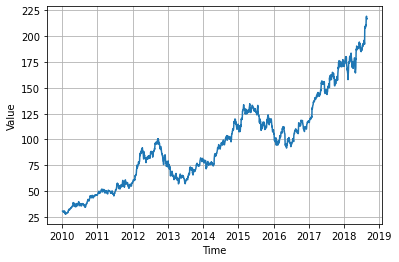

In [87]:
plot_series(days, series)

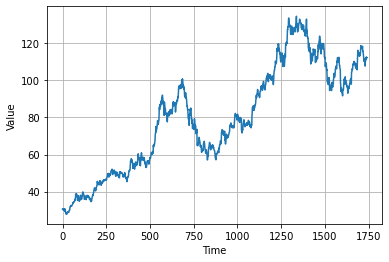

In [88]:
series_train=series[:split_time]
time_train=time[:split_time]
#visualise(series_train)
plot_series( time_train, series_train)

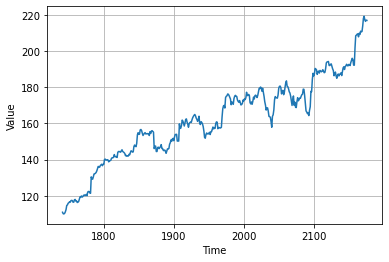

In [89]:
series_valid=series[split_time:]
time_valid=time[split_time:]
#visualise(series_valid)
plot_series(time_valid,series_valid)

In [90]:
def split_data(df, series, time, threshold=0.8):
    split_time= int(df.shape[0]*threshold)
    series_train=series[:split_time]
    time_train=time[:split_time]
    series_valid=series[split_time:]
    time_valid=time[split_time:]
    return series_train, series_valid

In [91]:
train_data, valid_data = split_data(apple_after_2009['high'], series, time )

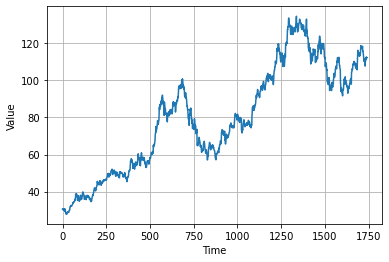

In [92]:
plot_series(time_train, train_data)

In [93]:
train_windows, train_batch= create_windows(train_data, window_size= 5, batch_size= 50  )

In [94]:
def print_windows(windows):
    for x,y in windows:
        print("x: " , x.numpy())
        print("y: ", y.numpy())

In [95]:
print_windows(train_windows)

x:  [77.08000183 77.83571625 77.99714661 78.74143219 78.12714386]
y:  [76.7142868]
x:  [115.75       116.34999847 117.19999695 116.08000183 114.65000153]
y:  [114.30000305]
x:  [64.112854   64.068573   64.84285736 65.46286011 65.56999969]
y:  [65.30999756]
x:  [33.80142975 34.10428619 34.0728569  34.31999969 34.56000137]
y:  [34.50571442]
x:  [72.55999756 72.49285889 67.66999817 67.91428375 67.40428925]
y:  [65.94428253]
x:  [62.32714462 62.24285889 62.12857056 61.66571426 60.85428619]
y:  [60.]
x:  [110.5        112.33999634 112.38999939 112.30000305 108.94999695]
y:  [108.]
x:  [113.30999756 114.52999878 111.87999725 112.33999634 112.77999878]
y:  [110.44999695]
x:  [128.88000488 128.77999878 129.02999878 129.5        133.        ]
y:  [133.6000061]
x:  [68.112854   70.9642868  71.08856964 71.97571564 72.79428864]
y:  [75.18428802]
x:  [56.75714111 57.01856995 57.65571594 58.44142914 58.32143021]
y:  [57.95000076]
x:  [112.80000305 111.98999786 112.25       109.51999664 107.37000275]

x:  [70.92857361 70.42142487 71.51428223 71.7485733  71.52571106]
y:  [71.33999634]
x:  [126.75       126.08000183 127.62000275 127.55999756 126.87999725]
y:  [127.19000244]
x:  [96.34999847 96.88999939 96.29000092 94.66000366 93.05000305]
y:  [93.66000366]
x:  [115.69999695 115.86000061 115.20999908 114.23000336 113.76999664]
y:  [112.34999847]
x:  [70.98714447 70.78142548 69.94857025 69.79428864 69.23857117]
y:  [68.80857086]
x:  [96.83999634 97.33000183 96.91999817 95.69999695 95.94000244]
y:  [96.34999847]
x:  [81.42857361 81.71286011 85.10713959 85.13999939 85.63285828]
y:  [84.97142792]
x:  [81.70714569 81.05285645 81.7142868  84.2857132  84.34571075]
y:  [83.68571472]
x:  [95.94000244 96.34999847 94.72000122 94.5        96.84999847]
y:  [98.20999908]
x:  [121.80999756 121.80999756 118.06999969 117.41999817 116.81999969]
y:  [115.56999969]
x:  [127.51000214 128.11999512 126.40000153 126.58000183 127.20999908]
y:  [128.57000732]
x:  [ 98.83999634  97.97000122 104.34999847 104.4499

y:  [92.50856781]
x:  [108.         108.08999634 106.93000031 106.48000336 105.65000153]
y:  [105.30000305]
x:  [118.11000061 116.79000092 119.25       119.86000061 118.59999847]
y:  [117.69000244]
x:  [89.12571716 88.818573   88.82286072 90.         91.23000336]
y:  [90.57142639]
x:  [58.2857132  57.27000046 56.74428558 55.52857208 55.0357132 ]
y:  [55.6428566]
x:  [95.68000031 95.48000336 95.94999695 94.81999969 96.08000183]
y:  [96.87999725]
x:  [111.76999664 110.19000244 112.27999878 112.75       112.44999695]
y:  [111.51999664]
x:  [119.83999634 122.15000153 124.91999817 127.48000336 127.27999878]
y:  [128.88000488]
x:  [57.45857239 55.55571365 54.66285706 54.54285812 54.25999832]
y:  [54.96857071]
x:  [42.7857132  43.13714218 43.20999908 45.         45.57143021]
y:  [44.82428741]
x:  [119.08999634 120.51000214 120.23000336 120.25       119.83999634]
y:  [122.15000153]
x:  [60.22714233 58.54571533 58.10571289 57.7114296  58.4642868 ]
y:  [57.6771431]
x:  [61.20714188 60.72857285 6

x:  [92.45714569 90.76856995 90.73285675 92.90000153 93.25571442]
y:  [91.72285461]
x:  [46.5014267  46.2114296  47.18000031 47.5        47.76285553]
y:  [47.8928566]
x:  [72.5        71.2842865  72.77714539 72.9642868  71.74571228]
y:  [72.55428314]
x:  [55.17285538 56.02999878 56.23714447 57.2142868  59.03285599]
y:  [60.40857315]
x:  [78.50856781 78.2857132  76.80571747 74.01856995 74.2857132 ]
y:  [76.41428375]
x:  [97.75       96.65000153 96.56999969 96.34999847 96.88999939]
y:  [96.29000092]
x:  [43.94285583 43.4271431  44.23857117 44.05714417 44.76571274]
y:  [44.5357132]
x:  [77.14286041 75.84285736 75.16000366 75.7842865  76.0342865 ]
y:  [74.69000244]
x:  [78.11428833 78.21142578 76.24143219 76.82571411 77.56999969]
y:  [78.2485733]
x:  [74.51999664 74.44142914 75.39428711 76.01999664 75.97571564]
y:  [75.87571716]
x:  [133.13000488 134.53999329 131.58999634 128.63999939 130.13000488]
y:  [130.57000732]
x:  [105.48999786 105.48000336 106.73999786 107.37000275 107.34999847]
y:

x:  [68.36428833 70.98714447 70.78142548 69.94857025 69.79428864]
y:  [69.23857117]
x:  [90.69000244 91.2485733  92.55571747 92.76714325 93.03713989]
y:  [93.87999725]
x:  [97.49714661 97.612854   95.72856903 95.69999695 97.92857361]
y:  [99.568573]
x:  [78.11428833 77.99428558 77.93714142 78.12285614 77.25714111]
y:  [77.5]
x:  [45.57143021 45.52142715 46.04714203 46.2842865  45.86000061]
y:  [46.07143021]
x:  [35.87714386 35.41285706 35.6071434  37.17856979 38.1071434 ]
y:  [38.88285828]
x:  [71.08856964 71.97571564 72.79428864 75.18428802 72.12714386]
y:  [72.53857422]
x:  [49.97142792 50.22714233 49.22857285 48.8928566  49.12857056]
y:  [48.63285828]
x:  [102.02999878 101.77999878 100.51999664  99.15000153  97.72000122]
y:  [99.]
x:  [103.19999695 100.08999634  99.38999939  99.30999756 103.08000183]
y:  [101.11000061]
x:  [76.34857178 75.99714661 76.19000244 76.96286011 76.76428223]
y:  [77.09428406]
x:  [75.18428802 72.12714386 72.53857422 73.55000305 73.64142609]
y:  [73.97571564

x:  [63.8571434  63.31999969 64.15428925 63.2514267  63.0357132 ]
y:  [62.44857025]
x:  [107.44000244 106.5        106.56999969 106.80000305 108.        ]
y:  [108.30000305]
x:  [131.58999634 128.63999939 130.13000488 130.57000732 128.44999695]
y:  [126.75]
x:  [84.48571777 82.62285614 81.82428741 81.64286041 81.99714661]
y:  [82.26856995]
x:  [84.2857132  84.17857361 84.03142548 83.16999817 82.82857513]
y:  [82.06999969]
x:  [112.48000336 118.12000275 119.19000244 120.         119.16999817]
y:  [119.08999634]
x:  [70.33999634 70.54856873 71.08285522 71.7142868  71.79000092]
y:  [72.11142731]
x:  [50.7885704  51.2857132  51.42856979 51.11428452 51.35428619]
y:  [51.42428589]
x:  [51.3571434  49.34285736 49.23428726 49.30714417 49.77571487]
y:  [50.72142792]
x:  [80.83571625 82.         82.85571289 83.07142639 81.80714417]
y:  [81.07142639]
x:  [75.49285889 75.09571075 76.0671463  76.17571259 75.85713959]
y:  [77.0357132]
x:  [34.83571243 34.92856979 35.84285736 35.2514267  36.01856995]

y:  [37.40714264]
x:  [75.98428345 75.0014267  75.53142548 75.04571533 72.5       ]
y:  [71.2842865]
x:  [29.18714333 29.12714195 29.02857208 28.9285717  28.76142883]
y:  [28.77714348]
x:  [41.13999939 41.8228569  41.93285751 42.10428619 41.681427  ]
y:  [41.40142822]
x:  [109.76999664 110.61000061 110.5        112.33999634 112.38999939]
y:  [112.30000305]
x:  [55.72285843 56.43571472 57.1428566  57.7857132  57.52000046]
y:  [56.71285629]
x:  [82.62285614 81.82428741 81.64286041 81.99714661 82.26856995]
y:  [82.0671463]
x:  [50.26142883 50.13571548 50.         49.88571548 49.95571518]
y:  [50.]
x:  [50.71285629 50.33571243 49.9642868  50.56428528 50.06714249]
y:  [49.98428726]
x:  [117.44000244 116.5        116.25       119.98999786 118.18000031]
y:  [115.41999817]
x:  [102.37999725 102.02999878 101.77999878 100.51999664  99.15000153]
y:  [97.72000122]
x:  [73.49714661 76.48571777 79.2857132  78.52428436 76.94714355]
y:  [75.61428833]
x:  [89.40856934 90.66571808 91.40571594 92.       

x:  [132.97000122 132.91999817 125.5        127.08999634 125.73999786]
y:  [123.61000061]
x:  [112.         111.75       114.16999817 115.58000183 115.5       ]
y:  [119.23000336]
x:  [128.08000183 129.33999634 130.17999268 128.33000183 127.23999786]
y:  [127.84999847]
x:  [46.2114296  47.18000031 47.5        47.76285553 47.8928566 ]
y:  [48.04999924]
x:  [49.3928566  50.73285675 50.5357132  50.71285629 50.33571243]
y:  [49.9642868]
x:  [117.56999969 118.76999664 119.75       119.09999847 119.40000153]
y:  [119.25]
x:  [77.5        78.10428619 80.02857208 79.55000305 78.86714172]
y:  [78.58142853]
x:  [95.90000153 94.06999969 93.44999695 93.76999664 93.56999969]
y:  [93.56999969]
x:  [131.63000488 132.97000122 132.91000366 132.25999451 131.94999695]
y:  [131.44999695]
x:  [113.80000305 113.37000275 113.05000305 114.30999756 113.66000366]
y:  [114.33999634]
x:  [41.42856979 40.93999863 40.41428757 41.34999847 41.71285629]
y:  [41.49714279]
x:  [65.25714111 66.12142944 67.23857117 67.412

x:  [66.08571625 65.61142731 65.63999939 65.13428497 65.67713928]
y:  [66.64286041]
x:  [65.35142517 65.8528595  65.37571716 65.42571259 66.01428223]
y:  [67.13571167]
x:  [87.38571167 88.05714417 87.24143219 88.2828598  89.26714325]
y:  [89.2857132]
x:  [48.23285675 49.68999863 50.30428696 49.7114296  49.33285904]
y:  [49.57857132]
x:  [82.85571289 83.07142639 81.80714417 81.07142639 80.92428589]
y:  [81.97856903]
x:  [92.69999695 92.29000092 92.30000305 92.55000305 91.62000275]
y:  [91.73999786]
x:  [79.76142883 80.61856842 80.91143036 81.31285858 82.16285706]
y:  [80.9642868]
x:  [81.71286011 85.10713959 85.13999939 85.63285828 84.97142792]
y:  [84.88571167]
x:  [50.22714233 49.22857285 48.8928566  49.12857056 48.63285828]
y:  [48.59285736]
x:  [61.39857101 61.63714218 61.52999878 61.74571609 62.12428665]
y:  [61.99714279]
x:  [28.         28.04571342 28.60000038 28.33857155 28.        ]
y:  [28.26857185]
x:  [35.22428513 36.37857056 37.12714386 37.59000015 37.8571434 ]
y:  [36.6399

In [96]:
print_windows(train_batch)

x:  [[ 35.98571396  35.85428619  36.26571274  37.02142715  37.12142944]
 [108.84999847 109.         107.69000244 109.43000031 108.69999695]
 [ 72.11142731  72.7514267   74.90000153  75.49285889  75.09571075]
 [ 86.76142883  86.62857056  86.67142487  87.12142944  87.818573  ]
 [111.45999908 110.25       110.51000214 111.72000122 111.31999969]
 [ 94.06999969  93.44999695  93.76999664  93.56999969  93.56999969]
 [ 57.6771431   57.45857239  55.55571365  54.66285706  54.54285812]
 [ 78.          79.76142883  80.61856842  80.91143036  81.31285858]
 [ 32.2114296   32.2142868   32.53285599  32.2142868   32.13999939]
 [109.69000244 109.09999847 109.31999969 108.75       107.87999725]
 [ 80.61856842  80.91143036  81.31285858  82.16285706  80.9642868 ]
 [ 33.92571259  33.80142975  34.10428619  34.0728569   34.31999969]
 [121.36000061 123.48999786 123.81999969 122.69000244 121.80999756]
 [ 50.7885704   51.2857132   51.42856979  51.11428452  51.35428619]
 [ 86.62857056  86.67142487  87.12142944  87

## Split data into training validation and test set

## 1.MVA 

## 2. Linear Regression

In [97]:
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras import layers


In [98]:
#Introduce parameters
window_size=50
batch_size=50
nof_epochs=100
lr_rate=1e-6
mom=0.9

In [99]:
#Create windows on training data
train_windows, train_batch= create_windows(train_data, window_size= 50, batch_size= 50 )

In [100]:
#Introduce model
linear_regression= kr.layers.Dense(1, input_shape=[window_size])#single layer with one neuron
model= kr.models.Sequential(linear_regression)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 51        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [101]:
#Choose mse loss function and sgd optimizer
model.compile(loss="mse", optimizer=kr.optimizers.SGD(lr=lr_rate, momentum=mom))

In [ ]:
history=model.fit(train_batch, epochs= nof_epochs)

Epoch 1/100
     34/Unknown - 1s 16ms/step - loss: 9823.5067 

In [ ]:
plt.plot(history.history["loss"][5:])
plt.title('Model Loss')
plt.ylabel('MSE')
plt.xlabel('epoch')

In [ ]:
print("Parameters")
print(linear_regression.get_weights())

In [ ]:
predictions=[]
for i in range(len(valid_data)-window_size):
    predictions.append(model.predict(valid_data[i:i+window_size][np.newaxis]))

In [ ]:
forecast = []
split_time=1741
window_size=50
for t in range(len(series) - window_size):
    forecast.append(model.predict(series[t:t + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]



In [ ]:
def compute_predicted(model, series, split_time, window_size):
    predicted_all=[]
    for t in range(len(series)-window_size):
        predicted_all.append(model.predict(series[t:t+window_size][np.newaxis]))
        
    predicted_valid=predicted_all[split_time-window_size:]
    predicted=np.array(predicted_valid)[:, 0, 0]
    return predicted

In [ ]:
predicted=compute_predicted(rnn, series, split_time, window_size)

In [ ]:
time

In [ ]:
plt.figure(figsize=(10, 6))

plot_series(time[split_time:], valid_data)
plot_series(time[split_time:], results)

In [ ]:
kr.metrics.mean_squared_error(valid_data, results).numpy()

In [ ]:
kr.metrics.mean_absolute_error(valid_data, results).numpy()

## 3. DNN


In [ ]:
#Reset all models
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras import layers


In [ ]:
#Introduce parameters
window_size=5
batch_size=50
nof_epochs=100
lr_rate=1e-6
mom=0.9

In [ ]:
#Create windows on training data
train_windows, train_batch= create_windows(train_data, window_size= 5, batch_size= 50 )

In [ ]:
dnn = kr.Sequential()

dnn.add(kr.layers.Dense(units=10,  input_shape=[window_size], activation='relu'))#input layer with relu activation

dnn.add(kr.layers.Dense(units=10, activation='relu'))#hidden layer with relu activation

dnn.add(kr.layers.Dense(1))#output layer

dnn.summary()

In [ ]:
dnn.compile(loss="mse", optimizer= kr.optimizers.SGD(lr=lr_rate, momentum=mom))

In [ ]:
history_dnn= dnn.fit(train_batch, epochs=nof_epochs)

In [ ]:
def plot_mse(model_history):
    plt.plot(model_history.history["loss"][5:])
    plt.title('Model Loss')
    plt.ylabel('MSE')
    plt.xlabel('epoch')

In [ ]:
plot_mse(history_dnn)

In [ ]:
predicted = compute_predicted(dnn, series, 1741, window_size)

In [ ]:
def plot_two(time, split_time, valid_data, predicted):
    plt.figure(figsize=(18, 9))

    plot_series(time[split_time:], valid_data)
    plot_series(time[split_time:], predicted)
    
    
plot_two(days, split_time, valid_data, predicted)

In [ ]:
kr.metrics.mean_squared_error(valid_data, predicted).numpy()

In [ ]:
kr.metrics.mean_absolute_error(valid_data, predicted).numpy()

### DNN with callback 

In [ ]:
#Reset all models
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras import layers


In [ ]:
#Introduce parameters
window_size=5
batch_size=50
nof_epochs=100
lr_rate=1e-8
mom=0.9

In [ ]:
#Create windows on training data
train_windows, train_batch= create_windows(train_data, window_size= 5, batch_size= 50 )

In [ ]:
dnn_callback = kr.Sequential()

dnn_callback.add(kr.layers.Dense(units=10,  input_shape=[window_size], activation='relu'))#input layer with relu activation

dnn_callback.add(kr.layers.Dense(units=10, activation='relu'))#hidden layer with relu activation

dnn_callback.add(kr.layers.Dense(1))#output layer

dnn_callback.summary()

In [ ]:
dnn_callback.compile(loss="mse", optimizer= kr.optimizers.SGD(lr=lr_rate, momentum=mom))

In [ ]:
lr_optimizer = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [ ]:
history_dnn_callback= dnn_callback.fit(train_batch, epochs=100, callbacks=[lr_optimizer], verbose=0)

In [ ]:
#plot mse across lr
lrs = lr_rate * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history_dnn_callback.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

In [ ]:
#Choose 1e-6

### Apply better learning rate

In [ ]:
#Reset all models
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras import layers


In [ ]:
#Introduce parameters
window_size=5
batch_size=50
nof_epochs=100
lr_rate=1e-6
mom=0.9
split_time=1741

In [ ]:
lr_rate=1e-5

In [ ]:
#Create windows on training data
train_windows, train_batch= create_windows(train_data, window_size= 5, batch_size= 50 )

In [ ]:
dnn_last = kr.Sequential()

dnn_last.add(kr.layers.Dense(units=10,  input_shape=[window_size], activation='relu'))#input layer with relu activation

dnn_last.add(kr.layers.Dense(units=10, activation='relu'))#hidden layer with relu activation

dnn_last.add(kr.layers.Dense(1))#output layer

dnn_last.summary()

In [ ]:
dnn_last.compile(loss="mse", optimizer= kr.optimizers.SGD(lr=lr_rate, momentum=mom))

In [ ]:
history_dnn_last= dnn_last.fit(train_batch, epochs=500,verbose=0)

In [ ]:
plot_mse(history_dnn_last)

In [ ]:
predicted_dnn_last=compute_predicted(dnn_last, series, split_time, window_size)

In [ ]:
plot_two(days, split_time, valid_data, predicted_dnn_last)

In [ ]:
kr.metrics.mean_squared_error(valid_data, predicted_dnn_last).numpy()

In [ ]:
kr.metrics.mean_absolute_error(valid_data, predicted_dnn_last).numpy()

## 4.RNN

## Univariate analysis

### Choose better learning rate with callback

In [ ]:
#Reset all models
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras import layers
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [ ]:
#Introduce parameters
window_size=5
batch_size=128 #2^n sth
nof_epochs=100
lr_rate=1e-8
mom=0.9
split_time=1741

In [ ]:
#Create windows on training data
train_windows, train_batch= create_windows(train_data, window_size= 5, batch_size= batch_size )

In [ ]:
rnn_callback = kr.Sequential()

rnn_callback.add(kr.layers.Lambda(lambda data : tf.expand_dims(data, axis=-1), input_shape=[None]))#preprocess the input dim for univariate

rnn_callback.add(kr.layers.SimpleRNN(units=40, return_sequences=True))#hidden layer with relu activation

rnn_callback.add(kr.layers.SimpleRNN(units=40, return_sequences=False))#hidden layer with relu activation

rnn_callback.add(kr.layers.Dense(1))#output layer

rnn_callback.add(kr.layers.Lambda(lambda x:  100.0*x ))#scaling 

rnn_callback.summary()

In [ ]:
rnn_callback.compile(loss=kr.losses.Huber(), optimizer= kr.optimizers.SGD(lr=lr_rate, momentum=mom), metrics=["mae", "mse"])

In [ ]:
lr_optimizer = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [ ]:
history_rnn_callback= rnn_callback.fit(train_batch, epochs=100, callbacks=[lr_optimizer], verbose=0)

In [ ]:
#plot mse across lr
plt.semilogx(history_rnn_callback.history["lr"], history_rnn_callback.history["loss"])
plt.axis([1e-8, 1e-3, 0, 30])

In [ ]:
#Choose lr= 5e-7
lr_rate=5e-7

In [ ]:
#clear
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)


In [ ]:
#Create windows on training data
train_windows, train_batch= create_windows(train_data, window_size= 5, batch_size= batch_size )

In [ ]:
rnn = kr.Sequential()

rnn.add(kr.layers.Lambda(lambda data : tf.expand_dims(data, axis=-1), input_shape=[None]))#preprocess the input dim for univariate

rnn.add(kr.layers.SimpleRNN(units=40, return_sequences=True))#hidden layer with relu activation

rnn.add(kr.layers.SimpleRNN(units=40, return_sequences=False))#hidden layer with relu activation

rnn.add(kr.layers.Dense(1))#output layer

rnn.add(kr.layers.Lambda(lambda x:  100.0*x ))#scaling 

rnn.summary()

In [ ]:
rnn.compile(loss=kr.losses.Huber(), optimizer= kr.optimizers.SGD(lr=lr_rate, momentum=mom), metrics=["mae", "mse"])

In [ ]:
history_rnn= rnn.fit(train_batch, epochs=500)

In [ ]:
plot_mse(history_rnn)

In [ ]:
#try with 400 epochs 
epc=400

In [ ]:
#clear
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)


In [ ]:
#Create windows on training data
train_windows, train_batch= create_windows(train_data, window_size= 5, batch_size= batch_size )

In [ ]:
rnn = kr.Sequential()

rnn.add(kr.layers.Lambda(lambda data : tf.expand_dims(data, axis=-1), input_shape=[None]))#preprocess the input dim for univariate

rnn.add(kr.layers.SimpleRNN(units=40, return_sequences=True))#hidden layer with relu activation

rnn.add(kr.layers.SimpleRNN(units=40, return_sequences=False))#hidden layer with relu activation

rnn.add(kr.layers.Dense(1))#output layer

rnn.add(kr.layers.Lambda(lambda x:  100.0*x ))#scaling 

rnn.summary()

In [ ]:
rnn.compile(loss=kr.losses.Huber(), optimizer= kr.optimizers.SGD(lr=lr_rate, momentum=mom), metrics=["mae", "mse"])

In [ ]:
history_rnn= rnn.fit(train_batch, epochs=epc)

In [ ]:
plot_mse(history_rnn)

In [ ]:
predicted_rnn=compute_predicted(rnn, series, split_time, window_size)

In [ ]:
plot_two(days, split_time, valid_data, predicted_rnn)

In [ ]:
kr.metrics.mean_squared_error(valid_data, predicted_rnn).numpy()

In [ ]:
kr.metrics.mean_absolute_error(valid_data, predicted_rnn).numpy()

## Multivariate analysis

## 5.LSTM

In [ ]:
#Reset all models
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras import layers


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
#Introduce parameters
window_size=5
batch_size=128 #2^n sth
nof_epochs=100
lr_rate=1e-6
mom=0.9
split_time=1741

In [ ]:
#Create windows on training data
train_windows, train_batch= create_windows(train_data, window_size= 5, batch_size= batch_size )

In [ ]:
lstm = kr.Sequential()

lstm.add(kr.layers.Lambda(lambda data : tf.expand_dims(data, axis=-1), input_shape=[None]))#preprocess the input dim for univariate

lstm.add(kr.layers.Bidirectional(kr.layers.LSTM(32, return_sequences=True)))#hidden layer with relu activation

lstm.add(kr.layers.Bidirectional(kr.layers.LSTM(32, return_sequences=False)))#hidden layer with relu activation

lstm.add(kr.layers.Dense(1))#output layer

lstm.add(kr.layers.Lambda(lambda x:  100.0*x ))#scaling 

lstm.summary()

In [ ]:
# Compiling 
lstm.compile(loss = kr.losses.Huber(), optimizer=kr.optimizers.SGD(lr=lr_rate, momentum=mom), metrics = ["mae", "mse"])

In [ ]:
history_lstm= lstm.fit(train_batch, epochs=4*nof_epochs)

In [ ]:
plot_mse(history_lstm)

In [ ]:
'''
history = model.fit(X, Y, epochs=100, validation_split=0.33)
history = model.fit(X, Y, epochs=100, validation_data=(valX, valY))
print("Evaluating model...")
    score = model.evaluate(data.x_test, data.y_test, verbose=0)
    print('Test accuracy:', score[1])
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(loss))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
'''

In [ ]:
predicted_lstm=compute_predicted(lstm, series, split_time, window_size)

In [ ]:
plot_two(days, split_time, valid_data, predicted_lstm)

In [ ]:
kr.metrics.mean_squared_error(valid_data, predicted_lstm).numpy()

In [ ]:
kr.metrics.mean_absolute_error(valid_data, predicted_lstm).numpy()

# 6.CNN- Bidirectional LSTM